# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results_l3/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results_l3/1908571880_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1889757798_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1642679791_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/855700733_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1890266440_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/980364771_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.4.json


In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1908571880_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
4:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
5:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
7:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
8:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
9:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (Con

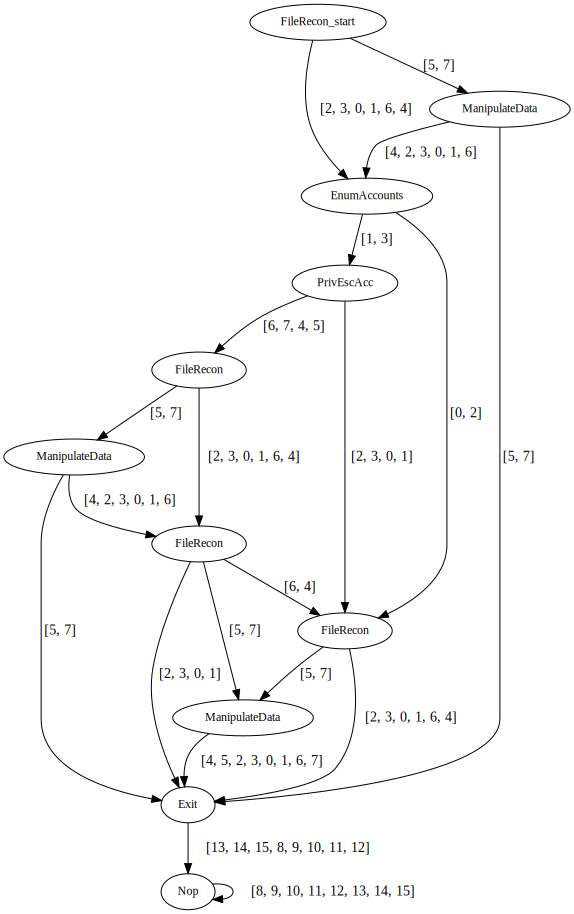

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1889757798_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
4:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
5:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
7:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
8:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
9:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (Con

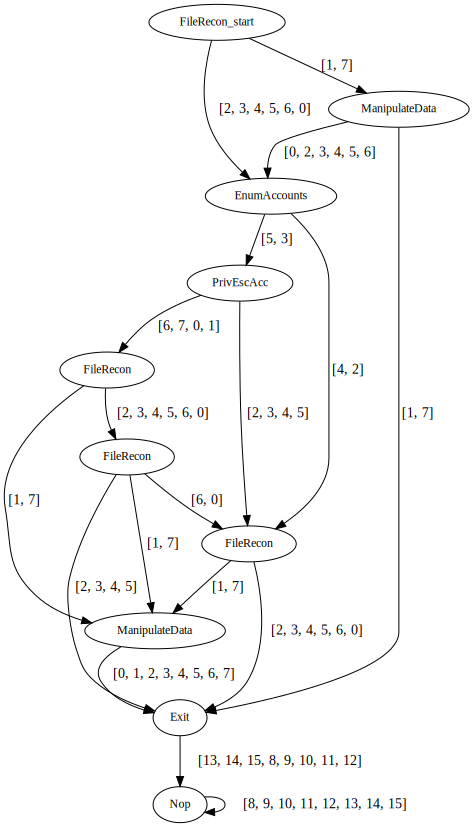

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1642679791_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


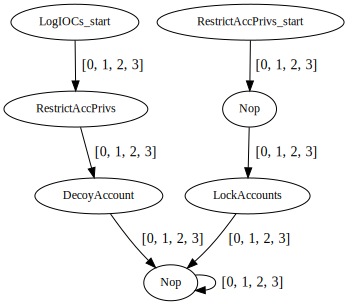

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/855700733_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


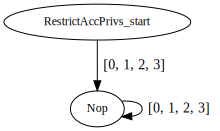

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1890266440_attl2_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
2:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated), (DefenseObs, none)]
3:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated), (DefenseObs, none)]
4:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
5:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated), (DefenseObs, none)]
6:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated), (DefenseObs, none)]
7:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, terminated), 

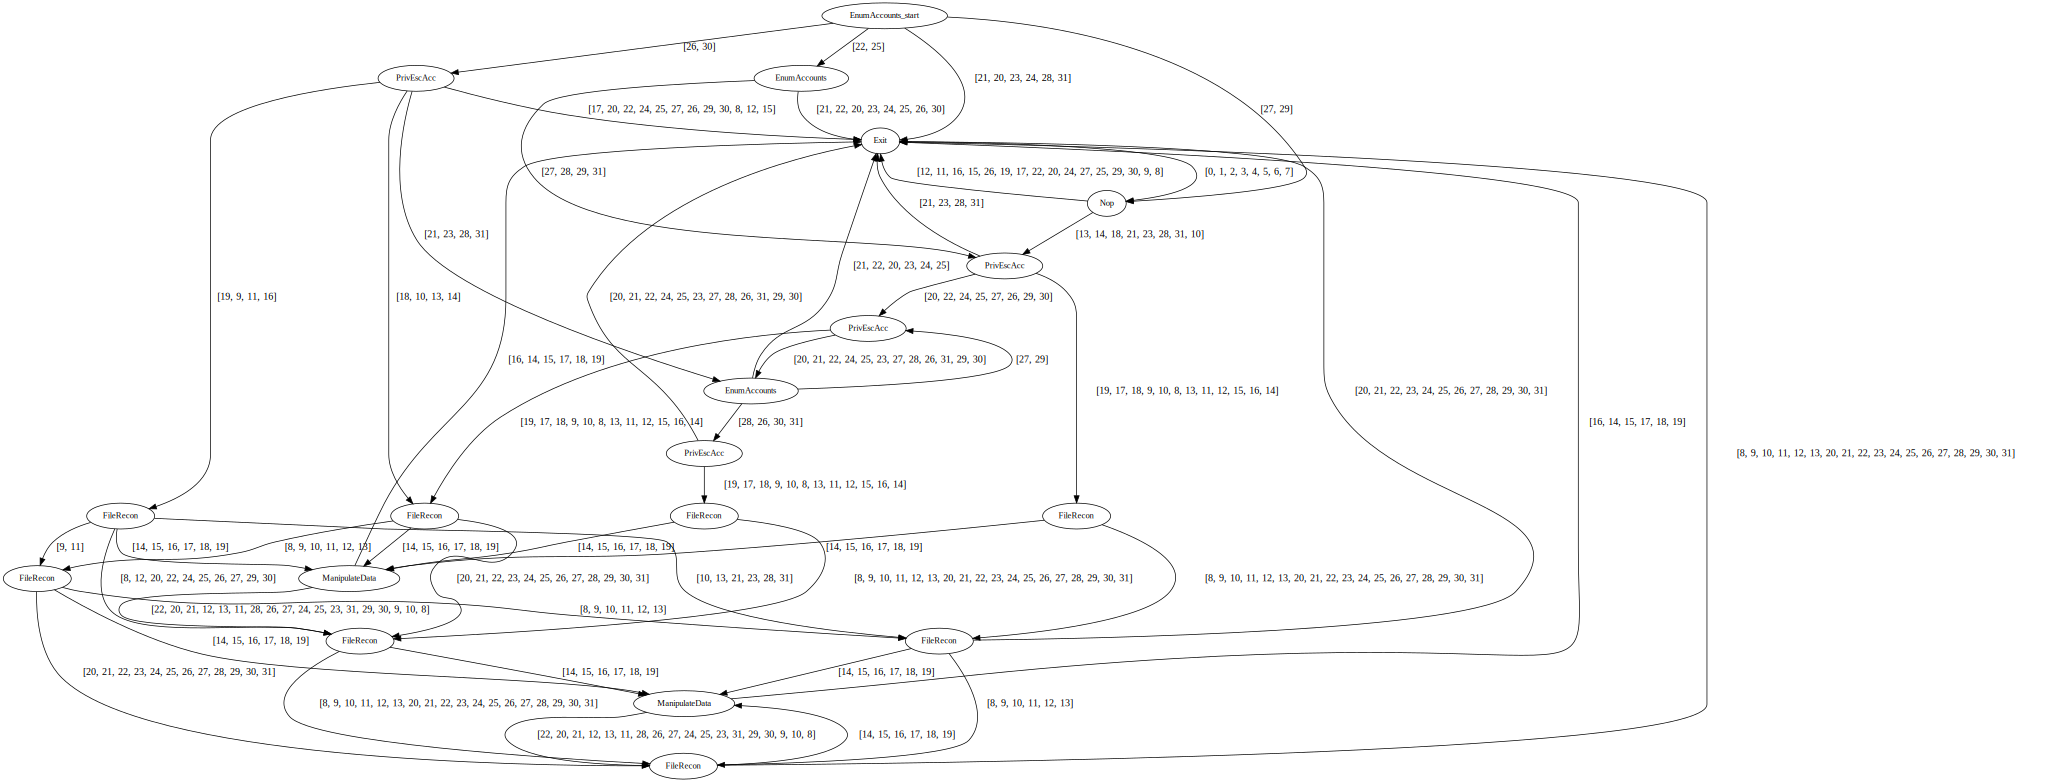

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/980364771_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


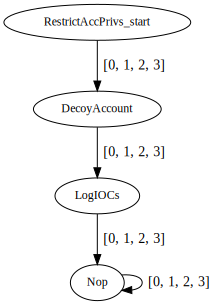

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.4.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                       file_write

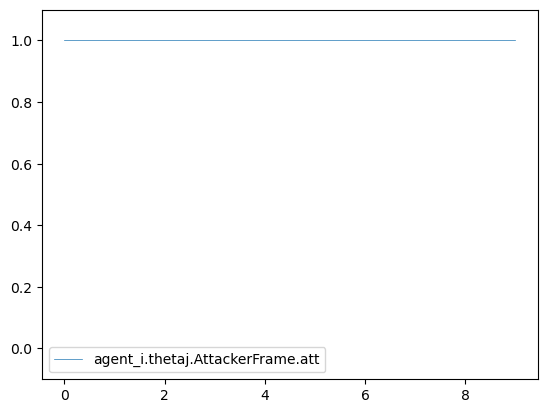

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.345454                        0.654545   
2                         0.334019                        0.665982   
3                         0.334019                        0.665982   
4                         0.334019                        0.665982   
5                         0.334019                        0.665982   
6                         0.334019                        0.665982   
7                         0.334019                        0.665982   
8                         0.334019                        0.665982   
9                         0.334019                        0.665982   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                         none   
4                            auth                         none   
5                          denied                         none   
6                            auth                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

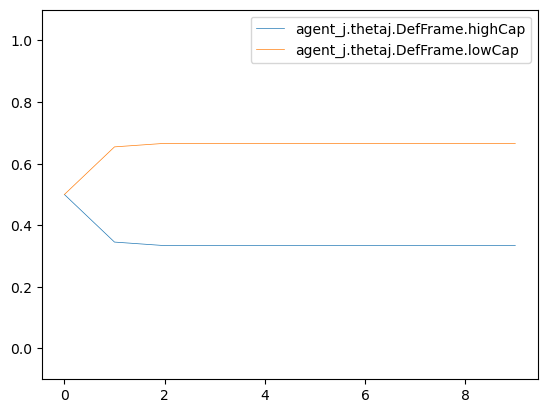

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action agent_j.action
0                  1.0                   0.0  RestrictAccPrivs   EnumAccounts
1                  1.0                   0.0      DecoyAccount   EnumAccounts
2                  1.0                   0.0           LogIOCs           Exit
3                  0.0                   1.0               Nop            Nop
4                  0.0                   1.0               Nop            Nop
5                  0.0                   1.0               Nop            Nop
6                  0.0                   1.0               Nop            Nop
7                  0.0                   1.0               Nop            Nop
8                  0.0                   1.0               Nop            Nop
9                  0.0                   1.0               Nop            Nop

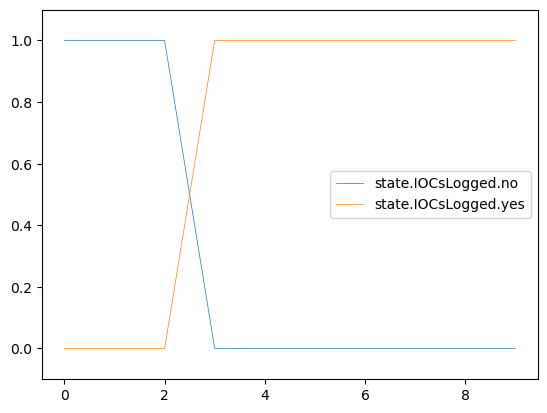

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                       file_write  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

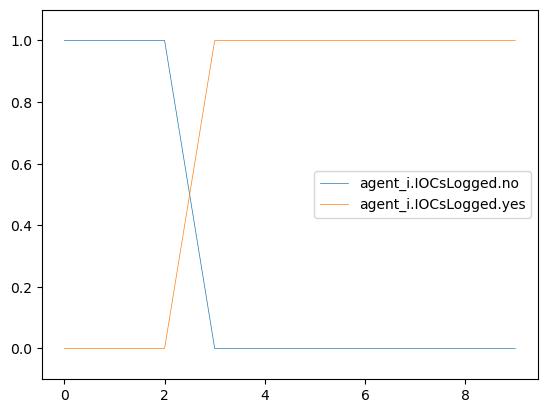

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.981818                0.018182   EnumAccounts   
2               0.998972                0.001028           Exit   
3               0.998972                0.001028            Nop   
4               0.998972                0.001028            Nop   
5               0.998972                0.001028            Nop   
6               0.998972                0.001028            Nop   
7               0.998972                0.001028            Nop   
8               0.998972                0.001028            Nop   
9               0.998972                0.001028            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

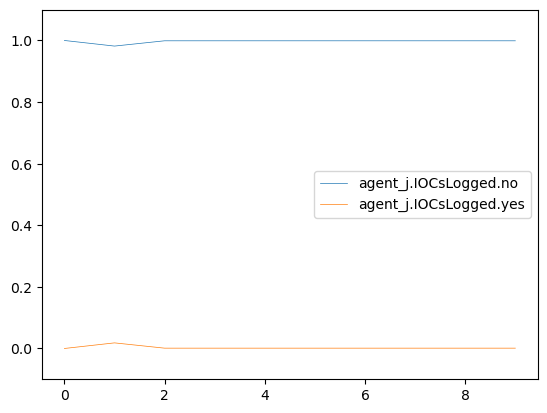

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

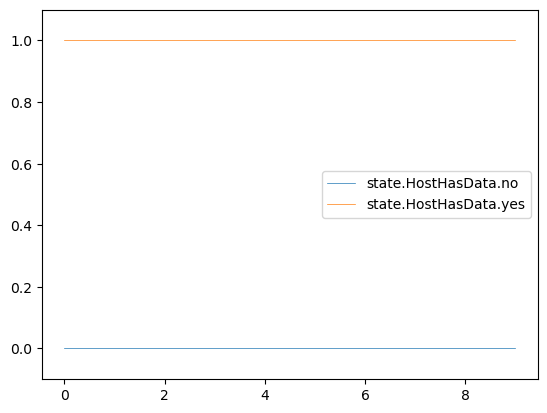

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                       file_write  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

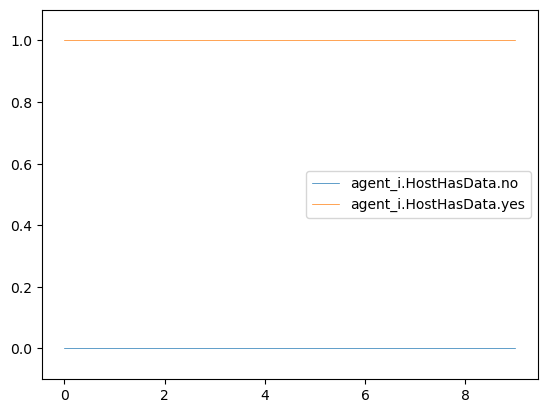

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5   EnumAccounts   
2                     0.5                      0.5           Exit   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

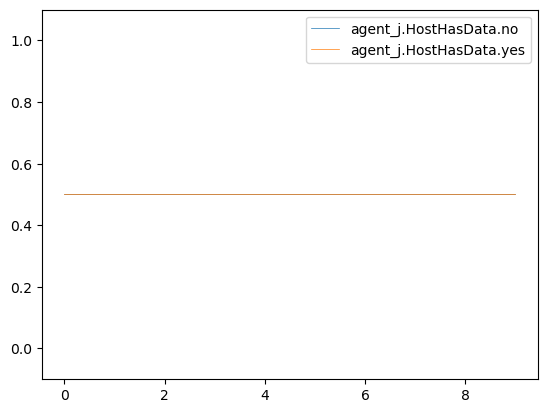

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action agent_j.action
0                 0.0                  1.0  RestrictAccPrivs   EnumAccounts
1                 0.0                  1.0      DecoyAccount   EnumAccounts
2                 0.0                  1.0           LogIOCs           Exit
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

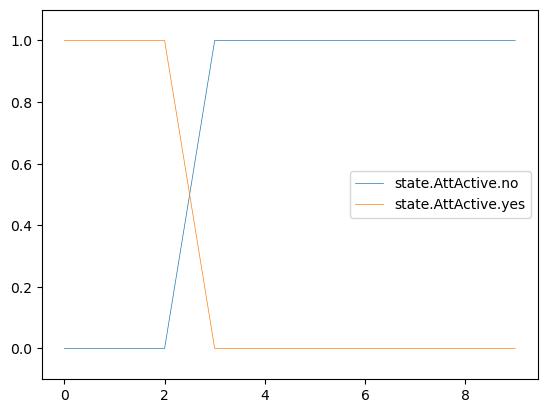

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000           1.000000e+00  RestrictAccPrivs   
1              0.000000           1.000000e+00      DecoyAccount   
2              0.095000           9.050000e-01           LogIOCs   
3              0.827498           1.725023e-01               Nop   
4              0.974031           2.596928e-02               Nop   
5              0.996222           3.777800e-03               Nop   
6              0.999787           2.125388e-04               Nop   
7              0.999992           7.779277e-06               Nop   
8              1.000000           2.139430e-07               Nop   
9              1.000000           4.237616e-09               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                       file_write  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

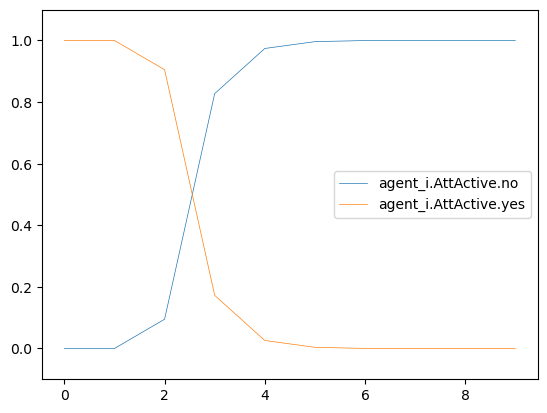

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0   EnumAccounts   
2                   0.0                    1.0           Exit   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

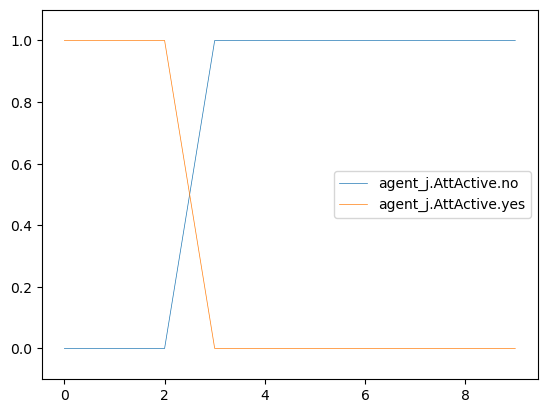

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

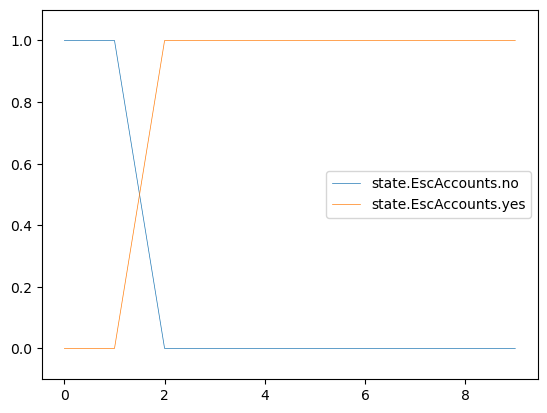

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                       file_write  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

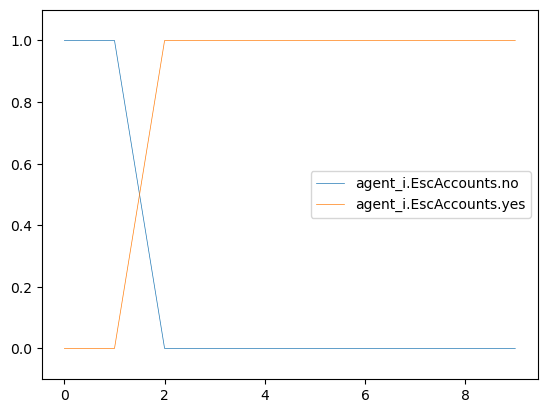

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194   EnumAccounts   
2                0.891285                 0.108715           Exit   
3                0.890369                 0.109631            Nop   
4                0.890369                 0.109631            Nop   
5                0.890369                 0.109631            Nop   
6                0.890369                 0.109631            Nop   
7                0.890369                 0.109631            Nop   
8                0.890369                 0.109631            Nop   
9                0.890369                 0.109631            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

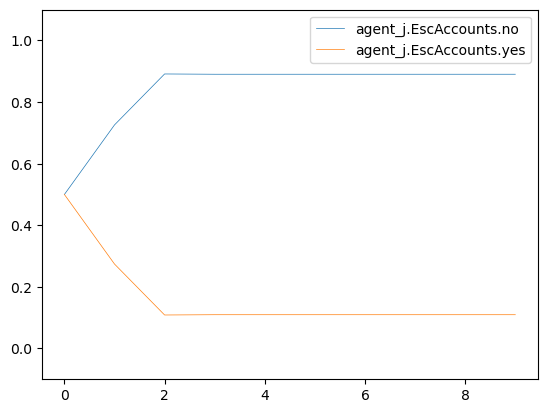

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0           LogIOCs   
3                     0.0                     1.0               Nop   
4                     0.0                     1.0               Nop   
5                     0.0                     1.0               Nop   
6                     0.0                     1.0               Nop   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

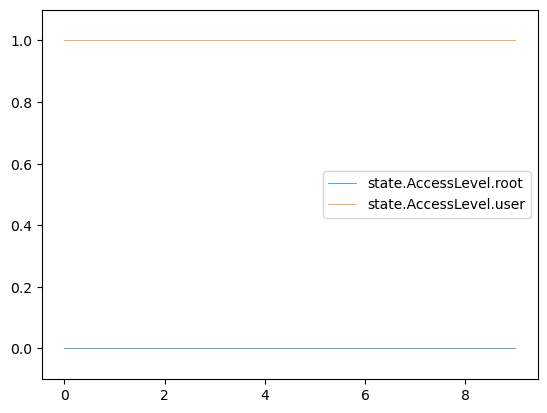

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000           LogIOCs   
3                  0.140935                  0.859065               Nop   
4                  0.025720                  0.974280               Nop   
5                  0.003758                  0.996242               Nop   
6                  0.002500                  0.997499               Nop   
7                  0.002454                  0.997546               Nop   
8                  0.002453                  0.997547               Nop   
9                  0.002453                  0.997547               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                       file_write  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

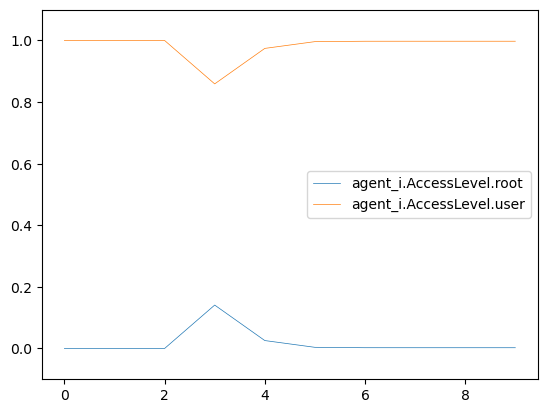

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0           Exit   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

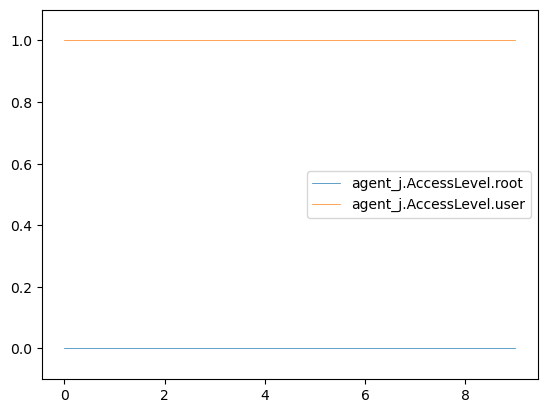

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

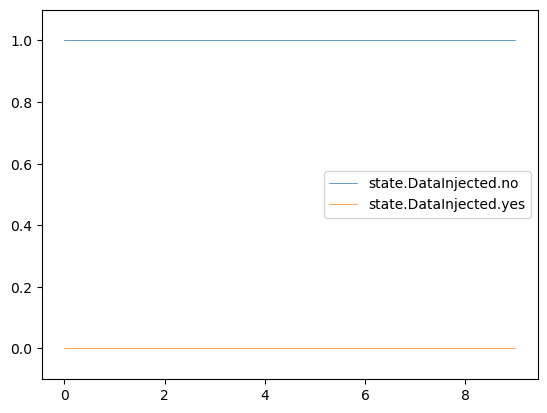

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.997858                  0.002142               Nop   
6                 0.997707                  0.002293               Nop   
7                 0.997701                  0.002298               Nop   
8                 0.997701                  0.002299               Nop   
9                 0.997701                  0.002299               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                       file_write  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

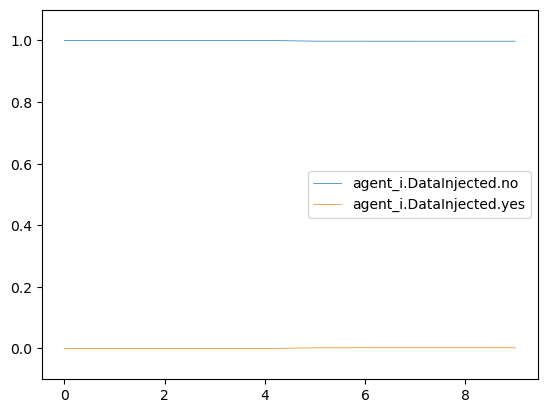

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0           Exit   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

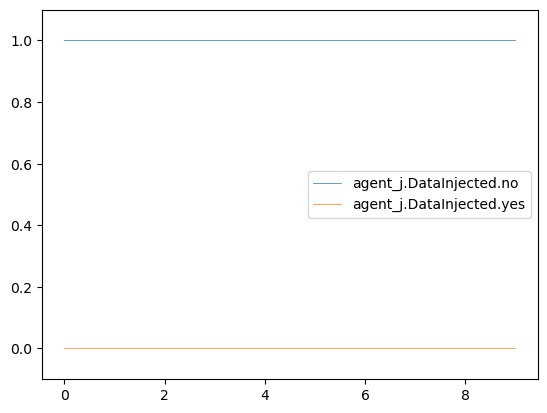

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action agent_j.action  
0                      1.0  RestrictAccPrivs   EnumAccounts  
1                      1.0      DecoyAccount   EnumAccounts  
2                      1.0           LogIOCs           Exit  
3                      1.0               Nop            Nop  
4                      1.0               Nop            Nop  
5                      1.0               Nop            Nop  
6                      1.0               Nop            Nop  
7                      1.0               Nop            Nop  
8                      1.0               Nop            Nop  
9                      1.0               Nop            Nop

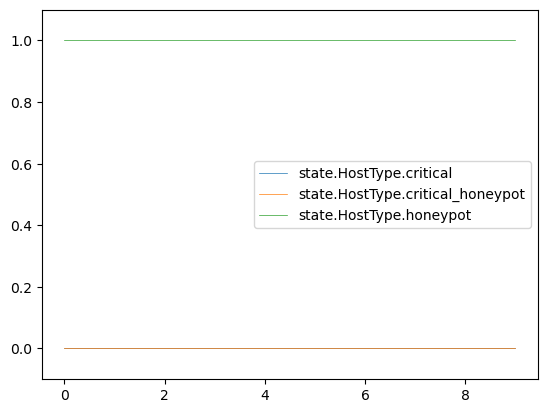

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action agent_j.action  \
0                        1.0  RestrictAccPrivs   EnumAccounts   
1                        1.0      DecoyAccount   EnumAccounts   
2                        1.0           LogIOCs           Exit   
3                        1.0               Nop            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                       file_write

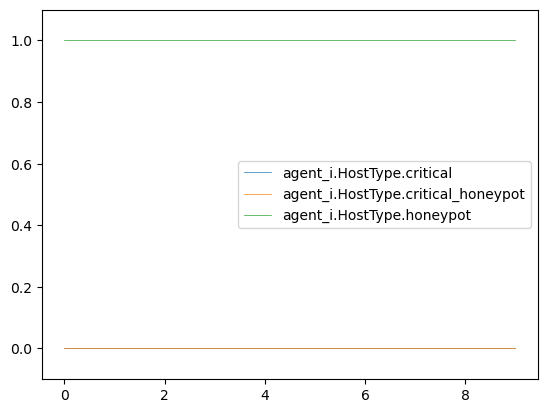

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action    agent_i.action  \
0                        0.0   EnumAccounts  RestrictAccPrivs   
1                        0.0   EnumAccounts      DecoyAccount   
2                        0.0           Exit           LogIOCs   
3                        0.0            Nop               Nop   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                         none   
4                            auth                         none   
5                          denied                         none   
6                            auth                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

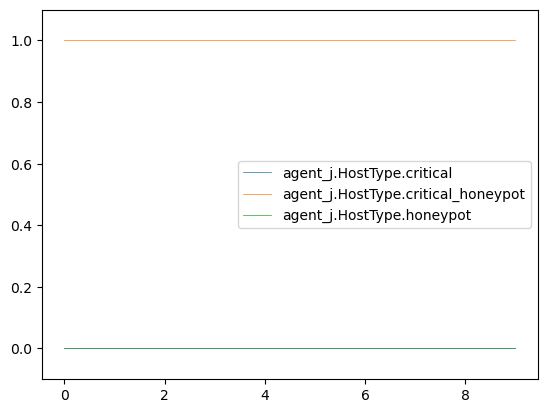

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action agent_j.action
0                1.0                 0.0  RestrictAccPrivs   EnumAccounts
1                1.0                 0.0      DecoyAccount   EnumAccounts
2                0.0                 1.0           LogIOCs           Exit
3                0.0                 1.0               Nop            Nop
4                0.0                 1.0               Nop            Nop
5                0.0                 1.0               Nop            Nop
6                0.0                 1.0               Nop            Nop
7                0.0                 1.0               Nop            Nop
8                0.0                 1.0               Nop            Nop
9                0.0                 1.0               Nop            Nop

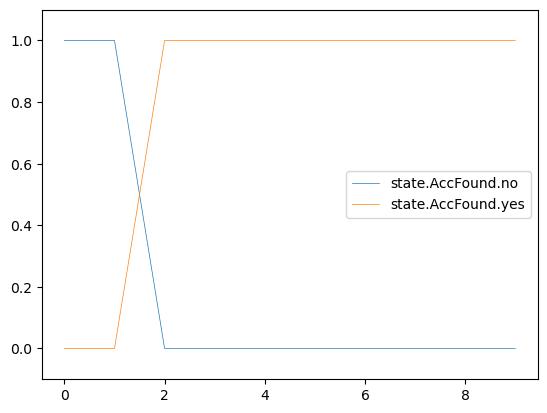

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action agent_j.action  \
0             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
1             1.000000              0.000000      DecoyAccount   EnumAccounts   
2             0.433000              0.567000           LogIOCs           Exit   
3             0.675273              0.324727               Nop            Nop   
4             0.778997              0.221003               Nop            Nop   
5             0.796519              0.203481               Nop            Nop   
6             0.797534              0.202466               Nop            Nop   
7             0.797571              0.202429               Nop            Nop   
8             0.797572              0.202428               Nop            Nop   
9             0.797572              0.202428               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                       file_write

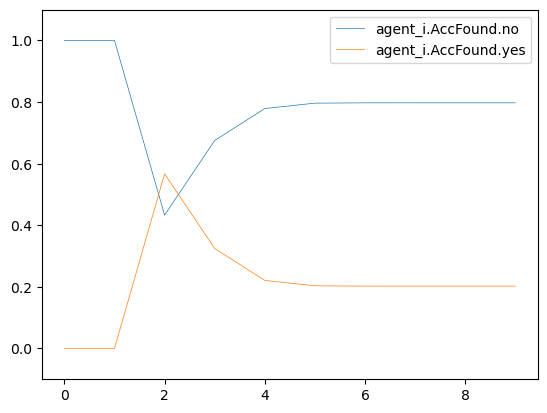

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action    agent_i.action  \
0             1.000000              0.000000   EnumAccounts  RestrictAccPrivs   
1             0.943548              0.056452   EnumAccounts      DecoyAccount   
2             0.971501              0.028499           Exit           LogIOCs   
3             0.971501              0.028499            Nop               Nop   
4             0.971501              0.028499            Nop               Nop   
5             0.971501              0.028499            Nop               Nop   
6             0.971501              0.028499            Nop               Nop   
7             0.971501              0.028499            Nop               Nop   
8             0.971501              0.028499            Nop               Nop   
9             0.971501              0.028499            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                         none   
4                            auth                         none   
5                          denied                         none   
6                            auth                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

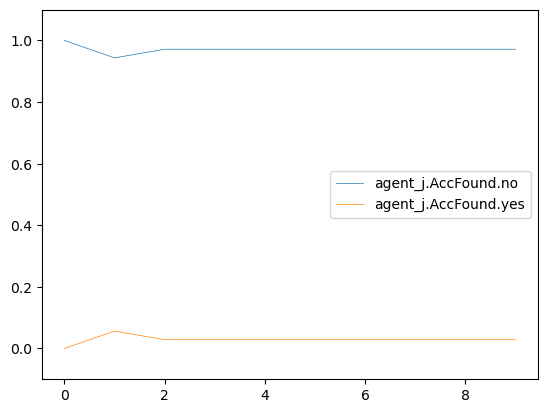

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action agent_j.action
0                 1.0                  0.0  RestrictAccPrivs   EnumAccounts
1                 1.0                  0.0      DecoyAccount   EnumAccounts
2                 1.0                  0.0           LogIOCs           Exit
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

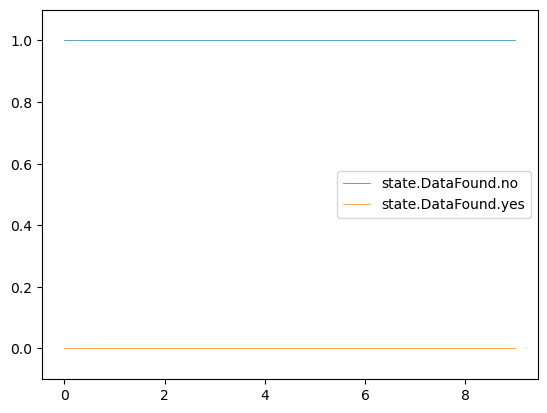

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000               Nop   
4              0.983710               0.016289               Nop   
5              0.996691               0.003309               Nop   
6              0.997662               0.002338               Nop   
7              0.997698               0.002302               Nop   
8              0.997699               0.002301               Nop   
9              0.997699               0.002301               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                       file_write  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

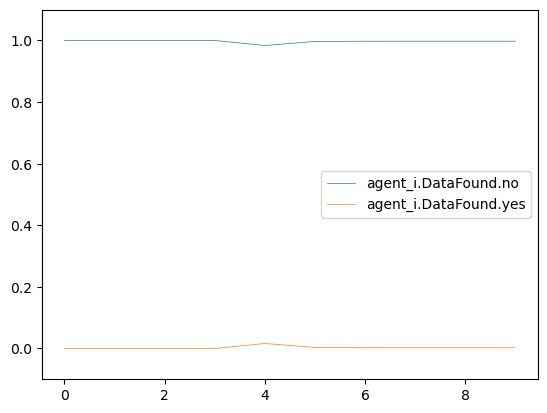

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0   EnumAccounts   
2                   1.0                    0.0           Exit   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

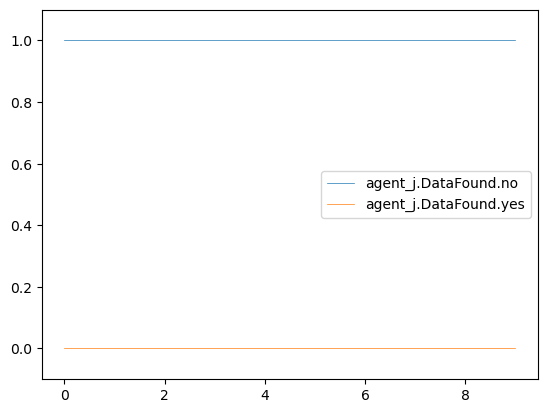

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action agent_j.action
0                   0.0                   1.0  RestrictAccPrivs   EnumAccounts
1                   1.0                   0.0      DecoyAccount   EnumAccounts
2                   1.0                   0.0           LogIOCs           Exit
3                   1.0                   0.0               Nop            Nop
4                   1.0                   0.0               Nop            Nop
5                   1.0                   0.0               Nop            Nop
6                   1.0                   0.0               Nop            Nop
7                   1.0                   0.0               Nop            Nop
8                   1.0                   0.0               Nop            Nop
9                   1.0                   0.0               Nop            Nop

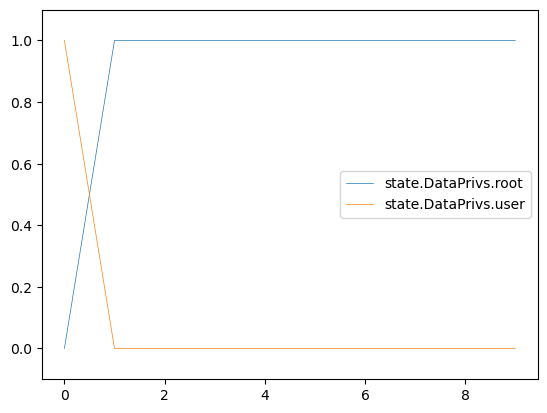

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                       file_write  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

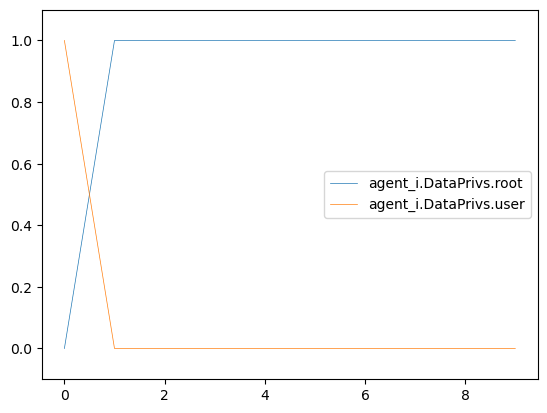

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.990909                0.009091   EnumAccounts   
2                1.000000                0.000000           Exit   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

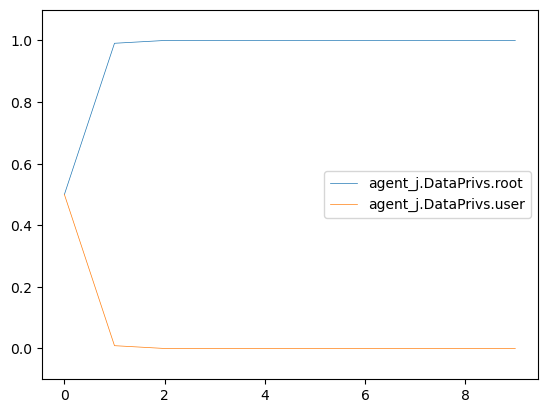

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                             none
3                               1.0                        file_enum
4                               1.0                             none
5                               1.0                       file_write
6                               1.0                        file_enum
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

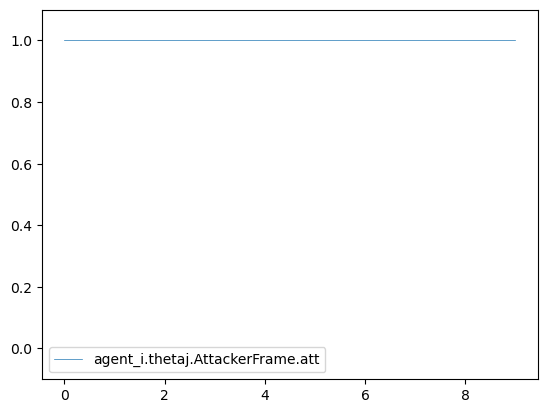

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.345454                        0.654545   
2                         0.334019                        0.665982   
3                         0.334019                        0.665982   
4                         0.334019                        0.665982   
5                         0.334019                        0.665982   
6                         0.334019                        0.665982   
7                         0.334019                        0.665982   
8                         0.334019                        0.665982   
9                         0.334019                        0.665982   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                            auth                         none   
3                            auth                   user_files   
4                          denied                         none   
5                            auth                   user_files   
6                          denied                         none   
7                          denied                         none   
8                          denied                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

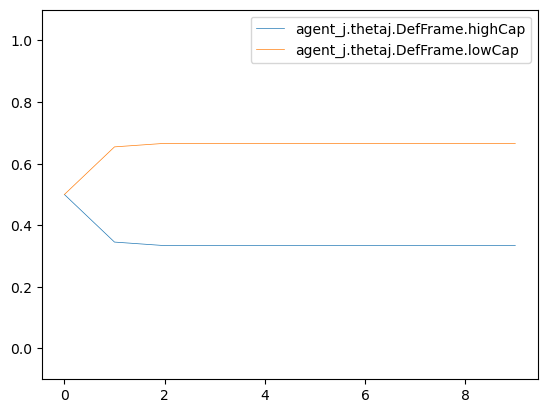

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action agent_j.action
0                  1.0                   0.0  RestrictAccPrivs   EnumAccounts
1                  1.0                   0.0      DecoyAccount   EnumAccounts
2                  1.0                   0.0           LogIOCs           Exit
3                  0.0                   1.0               Nop            Nop
4                  0.0                   1.0               Nop            Nop
5                  0.0                   1.0               Nop            Nop
6                  0.0                   1.0               Nop            Nop
7                  0.0                   1.0               Nop            Nop
8                  0.0                   1.0               Nop            Nop
9                  0.0                   1.0               Nop            Nop

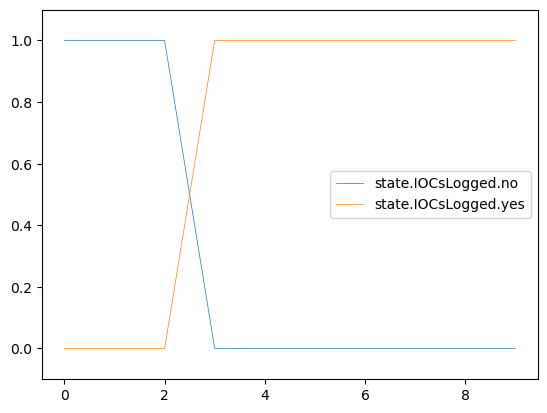

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                             none  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

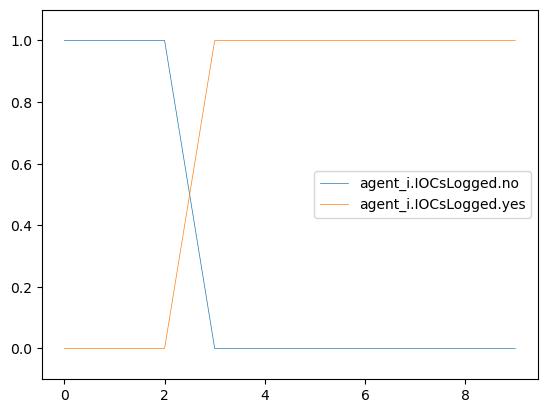

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.981818                0.018182   EnumAccounts   
2               0.998972                0.001028           Exit   
3               0.998972                0.001028            Nop   
4               0.998972                0.001028            Nop   
5               0.998972                0.001028            Nop   
6               0.998972                0.001028            Nop   
7               0.998972                0.001028            Nop   
8               0.998972                0.001028            Nop   
9               0.998972                0.001028            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                   user_files                           success   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

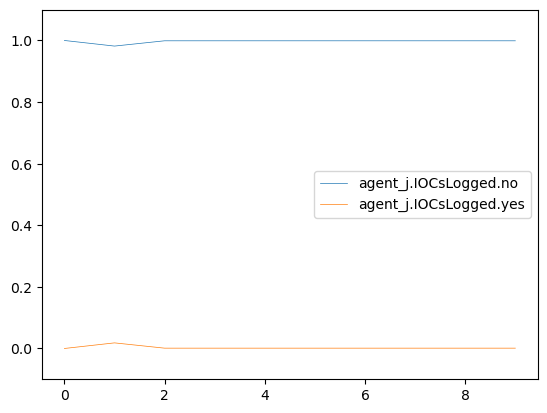

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

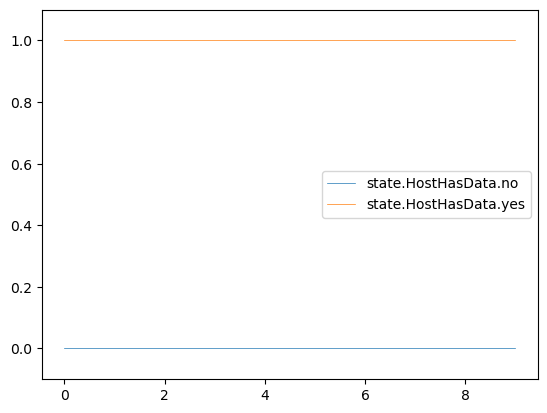

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                             none  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

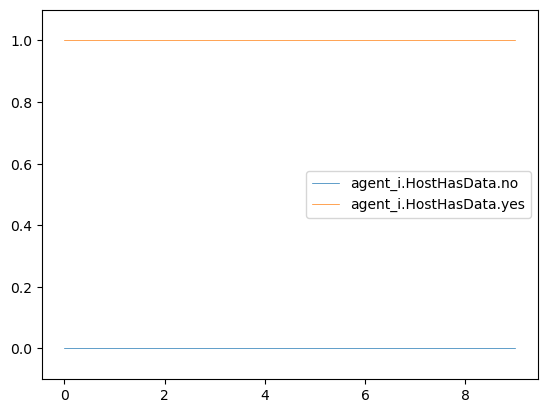

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5   EnumAccounts   
2                     0.5                      0.5           Exit   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                   user_files                           success   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

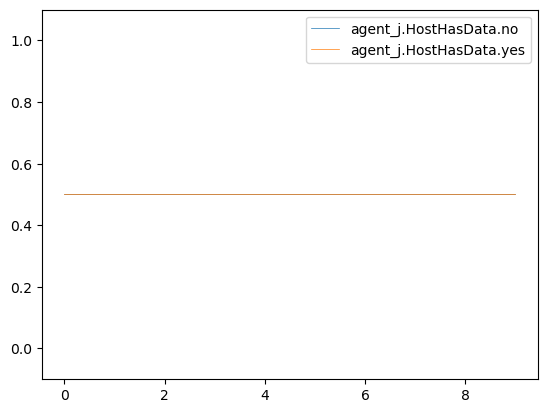

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action agent_j.action
0                 0.0                  1.0  RestrictAccPrivs   EnumAccounts
1                 0.0                  1.0      DecoyAccount   EnumAccounts
2                 0.0                  1.0           LogIOCs           Exit
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

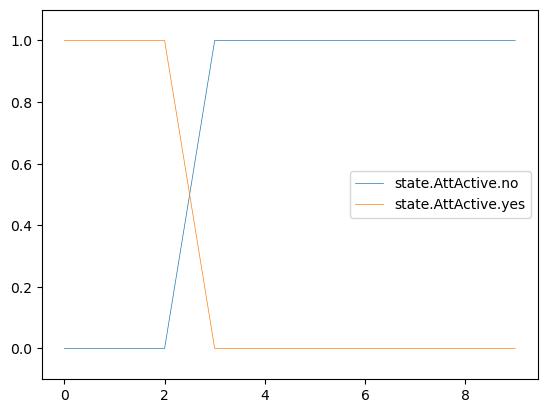

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000  RestrictAccPrivs   
1              0.000000               1.000000      DecoyAccount   
2              0.016212               0.983788           LogIOCs   
3              0.810153               0.189847               Nop   
4              0.397418               0.602582               Nop   
5              0.821995               0.178005               Nop   
6              0.744528               0.255472               Nop   
7              0.955762               0.044238               Nop   
8              0.996451               0.003549               Nop   
9              0.999983               0.000017               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                             none  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

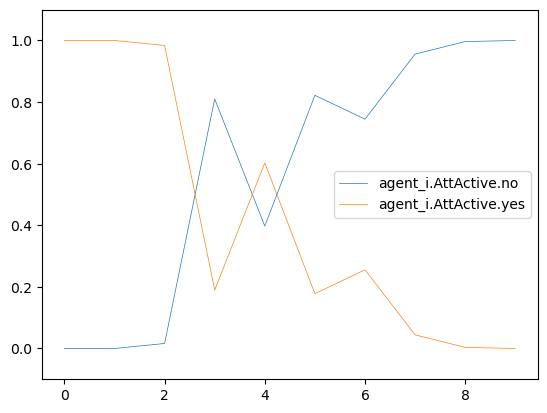

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0   EnumAccounts   
2                   0.0                    1.0           Exit   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                   user_files                           success   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

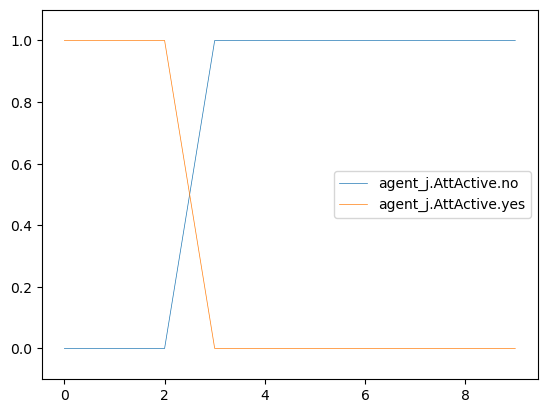

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

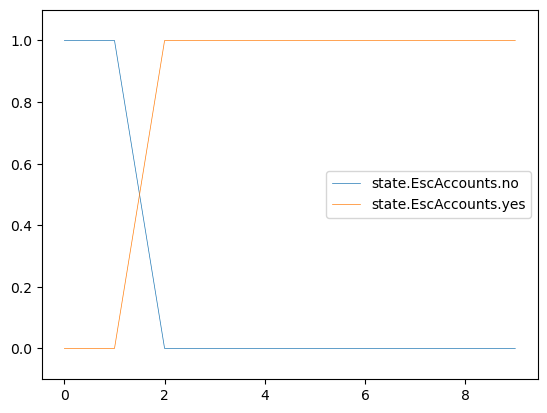

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                             none  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

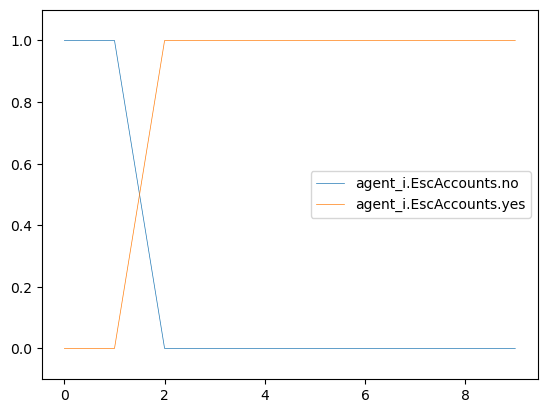

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194   EnumAccounts   
2                0.891285                 0.108715           Exit   
3                0.890369                 0.109631            Nop   
4                0.890369                 0.109631            Nop   
5                0.890369                 0.109631            Nop   
6                0.890369                 0.109631            Nop   
7                0.890369                 0.109631            Nop   
8                0.890369                 0.109631            Nop   
9                0.890369                 0.109631            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                   user_files                           success   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

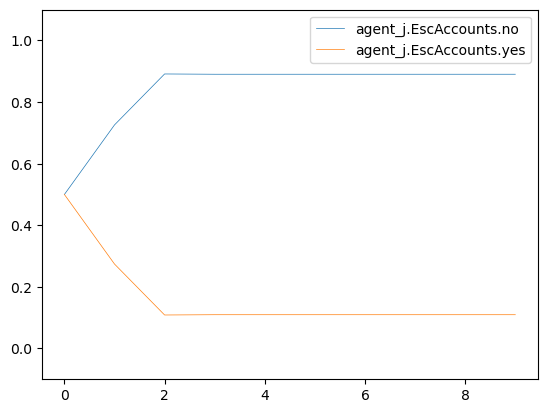

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0           LogIOCs   
3                     0.0                     1.0               Nop   
4                     0.0                     1.0               Nop   
5                     0.0                     1.0               Nop   
6                     0.0                     1.0               Nop   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

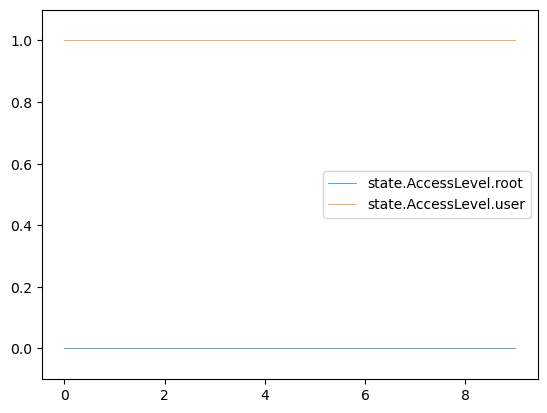

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000           LogIOCs   
3                  0.176961                  0.823039               Nop   
4                  0.602100                  0.397900               Nop   
5                  0.177880                  0.822120               Nop   
6                  0.349828                  0.650172               Nop   
7                  0.369944                  0.630056               Nop   
8                  0.356526                  0.643474               Nop   
9                  0.356461                  0.643539               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                             none  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

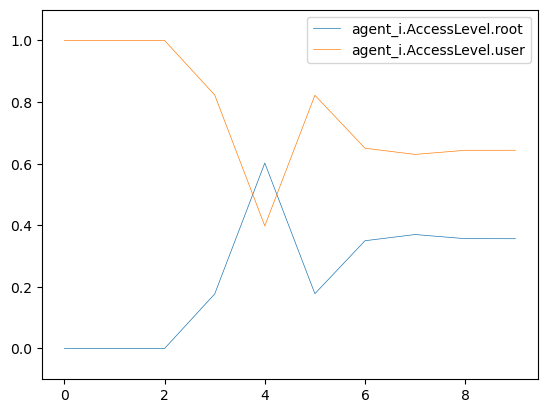

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0           Exit   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                   user_files                           success   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

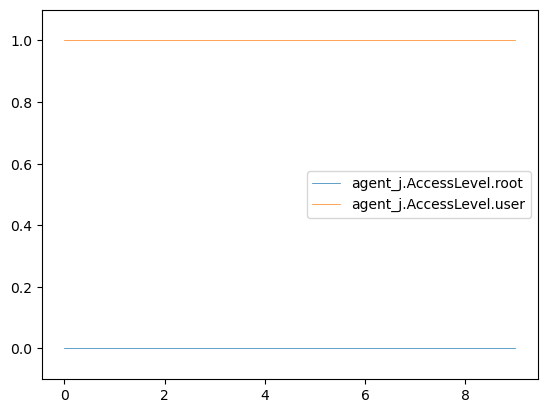

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

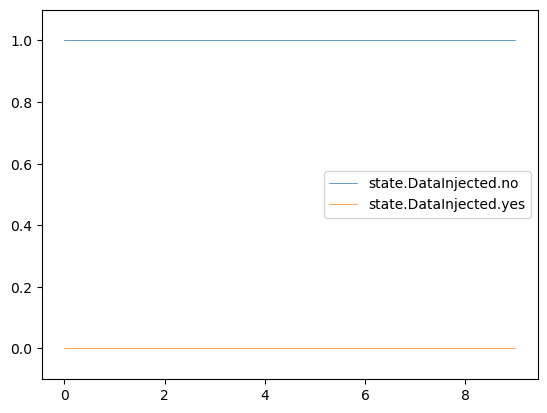

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.888176                  0.111824               Nop   
6                 0.671867                  0.328133               Nop   
7                 0.672621                  0.327379               Nop   
8                 0.663781                  0.336219               Nop   
9                 0.663746                  0.336254               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                             none  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

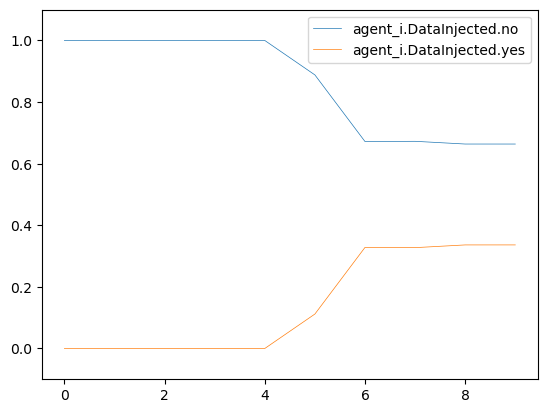

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0           Exit   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                   user_files                           success   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

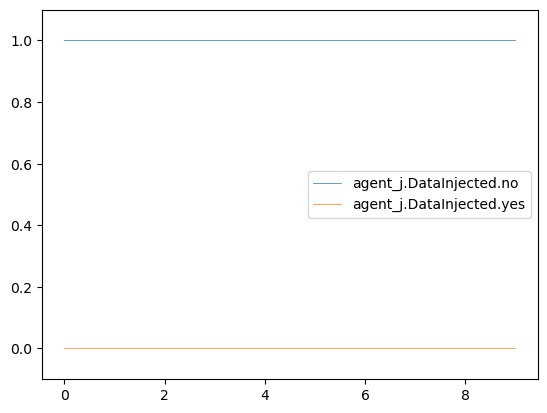

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action agent_j.action  
0                      1.0  RestrictAccPrivs   EnumAccounts  
1                      1.0      DecoyAccount   EnumAccounts  
2                      1.0           LogIOCs           Exit  
3                      1.0               Nop            Nop  
4                      1.0               Nop            Nop  
5                      1.0               Nop            Nop  
6                      1.0               Nop            Nop  
7                      1.0               Nop            Nop  
8                      1.0               Nop            Nop  
9                      1.0               Nop            Nop

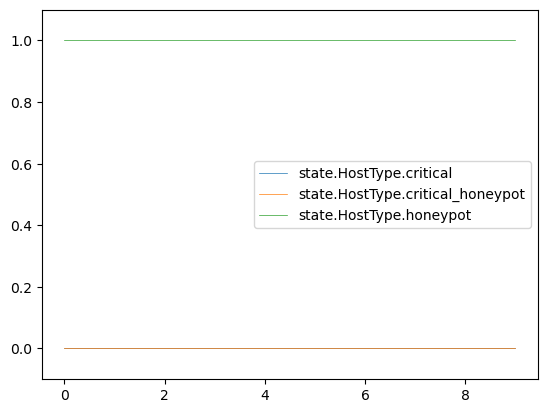

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action agent_j.action  \
0                        1.0  RestrictAccPrivs   EnumAccounts   
1                        1.0      DecoyAccount   EnumAccounts   
2                        1.0           LogIOCs           Exit   
3                        1.0               Nop            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                        file_enum  
4                             none  
5                       file_write  
6                        file_enum  
7                             none  
8                             none  
9                             none

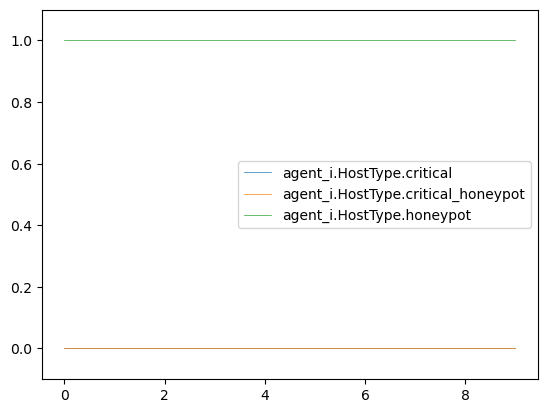

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action    agent_i.action  \
0                        0.0   EnumAccounts  RestrictAccPrivs   
1                        0.0   EnumAccounts      DecoyAccount   
2                        0.0           Exit           LogIOCs   
3                        0.0            Nop               Nop   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                            auth                         none   
3                            auth                   user_files   
4                          denied                         none   
5                            auth                   user_files   
6                          denied                         none   
7                          denied                         none   
8                          denied                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

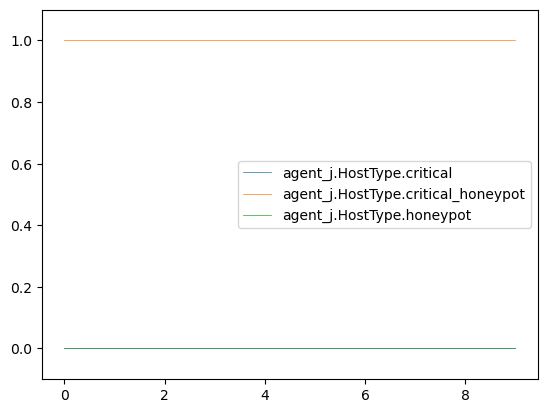

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action agent_j.action
0                1.0                 0.0  RestrictAccPrivs   EnumAccounts
1                1.0                 0.0      DecoyAccount   EnumAccounts
2                0.0                 1.0           LogIOCs           Exit
3                0.0                 1.0               Nop            Nop
4                0.0                 1.0               Nop            Nop
5                0.0                 1.0               Nop            Nop
6                0.0                 1.0               Nop            Nop
7                0.0                 1.0               Nop            Nop
8                0.0                 1.0               Nop            Nop
9                0.0                 1.0               Nop            Nop

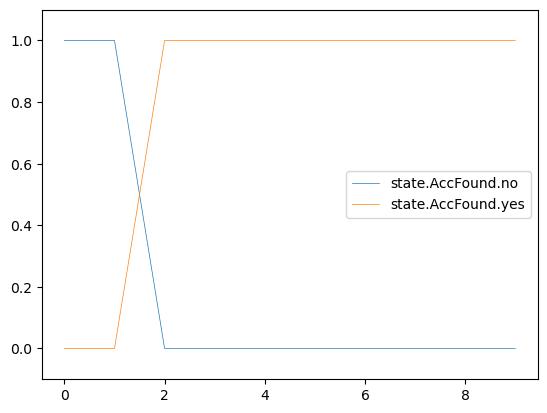

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action agent_j.action  \
0             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
1             1.000000              0.000000      DecoyAccount   EnumAccounts   
2             0.322696              0.677304           LogIOCs           Exit   
3             0.610005              0.389995               Nop            Nop   
4             0.295865              0.704135               Nop            Nop   
5             0.611020              0.388980               Nop            Nop   
6             0.483271              0.516729               Nop            Nop   
7             0.468318              0.531682               Nop            Nop   
8             0.478292              0.521708               Nop            Nop   
9             0.478340              0.521660               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                        file_enum  
4                             none  
5                       file_write  
6                        file_enum  
7                             none  
8                             none  
9                             none

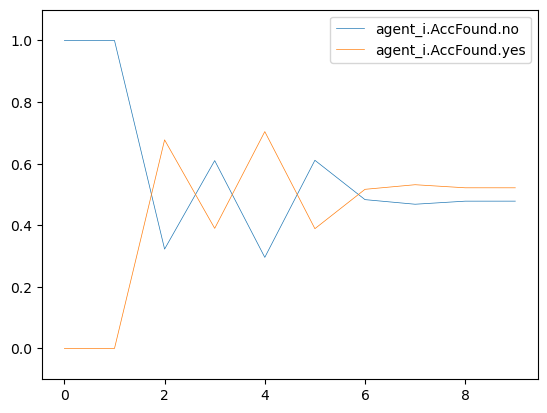

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action    agent_i.action  \
0             1.000000              0.000000   EnumAccounts  RestrictAccPrivs   
1             0.943548              0.056452   EnumAccounts      DecoyAccount   
2             0.971501              0.028499           Exit           LogIOCs   
3             0.971501              0.028499            Nop               Nop   
4             0.971501              0.028499            Nop               Nop   
5             0.971501              0.028499            Nop               Nop   
6             0.971501              0.028499            Nop               Nop   
7             0.971501              0.028499            Nop               Nop   
8             0.971501              0.028499            Nop               Nop   
9             0.971501              0.028499            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                            auth                         none   
3                            auth                   user_files   
4                          denied                         none   
5                            auth                   user_files   
6                          denied                         none   
7                          denied                         none   
8                          denied                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

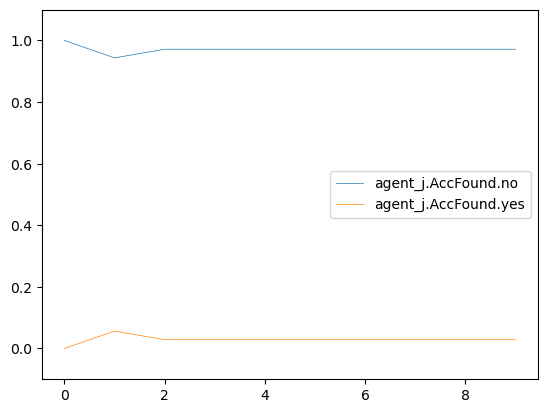

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action agent_j.action
0                 1.0                  0.0  RestrictAccPrivs   EnumAccounts
1                 1.0                  0.0      DecoyAccount   EnumAccounts
2                 1.0                  0.0           LogIOCs           Exit
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

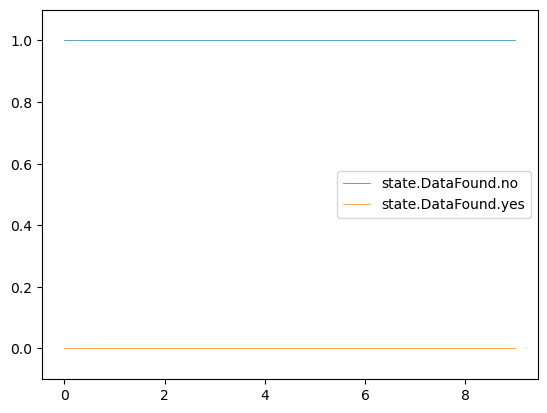

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000               Nop   
4              0.579433               0.420567               Nop   
5              0.840073               0.159927               Nop   
6              0.662748               0.337252               Nop   
7              0.647484               0.352516               Nop   
8              0.660549               0.339451               Nop   
9              0.660541               0.339459               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                             none  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

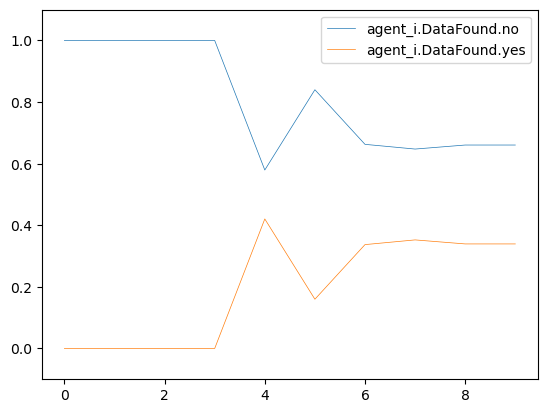

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0   EnumAccounts   
2                   1.0                    0.0           Exit   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                   user_files                           success   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

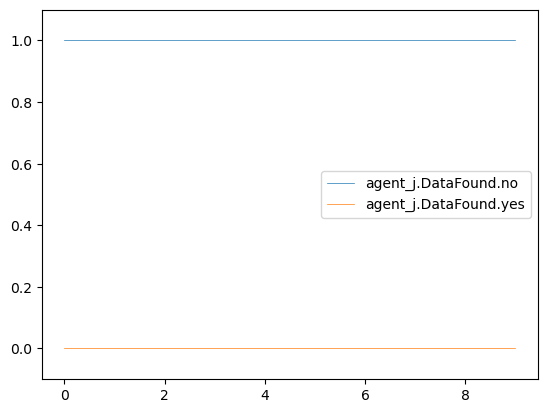

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action agent_j.action
0                   0.0                   1.0  RestrictAccPrivs   EnumAccounts
1                   1.0                   0.0      DecoyAccount   EnumAccounts
2                   1.0                   0.0           LogIOCs           Exit
3                   1.0                   0.0               Nop            Nop
4                   1.0                   0.0               Nop            Nop
5                   1.0                   0.0               Nop            Nop
6                   1.0                   0.0               Nop            Nop
7                   1.0                   0.0               Nop            Nop
8                   1.0                   0.0               Nop            Nop
9                   1.0                   0.0               Nop            Nop

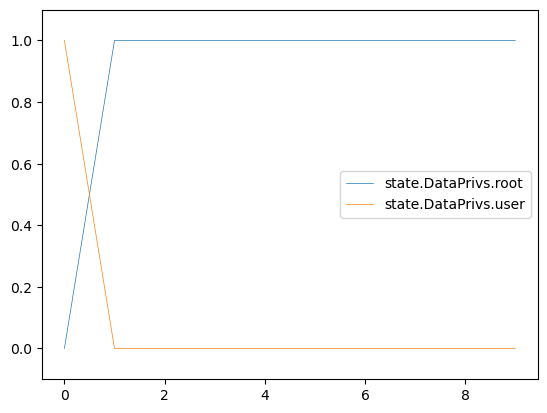

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                             none  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

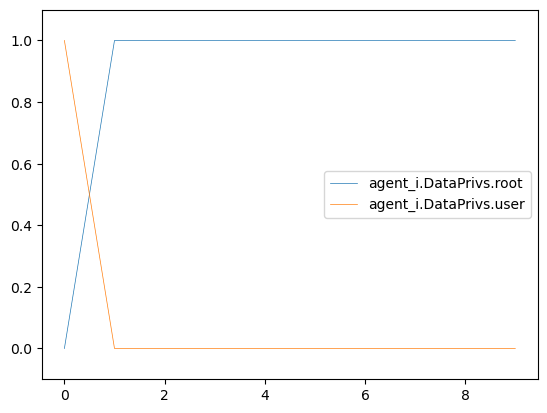

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.990909                0.009091   EnumAccounts   
2                1.000000                0.000000           Exit   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                   user_files                           success   
6                         none                           failure   
7                         none                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

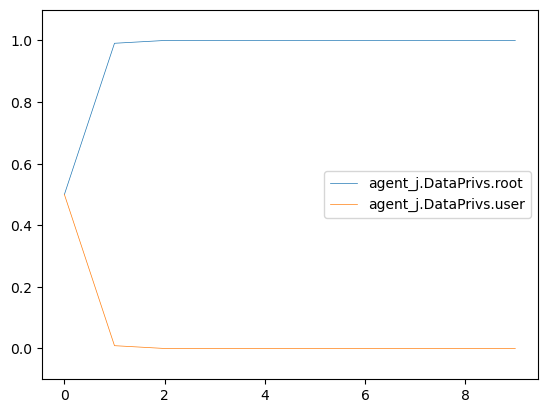

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                       file_write
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                   login_activity
8                               1.0                             none
9                               1.0                             none

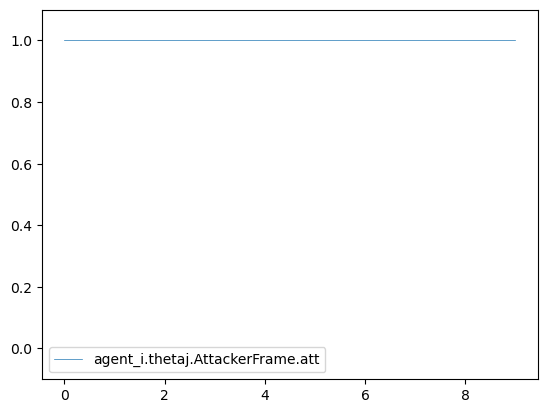

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.345454                        0.654545   
2                         0.334019                        0.665982   
3                         0.001541                        0.998459   
4                         0.001541                        0.998459   
5                         0.001541                        0.998459   
6                         0.001541                        0.998459   
7                         0.001541                        0.998459   
8                         0.001541                        0.998459   
9                         0.001541                        0.998459   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                         none   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           success                          active   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

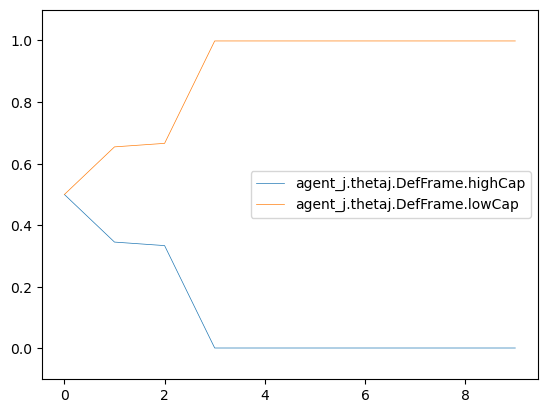

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action  agent_j.action
0                  1.0                   0.0  RestrictAccPrivs    EnumAccounts
1                  1.0                   0.0      DecoyAccount    EnumAccounts
2                  1.0                   0.0           LogIOCs      PrivEscAcc
3                  0.0                   1.0               Nop       FileRecon
4                  0.0                   1.0               Nop  ManipulateData
5                  0.0                   1.0               Nop            Exit
6                  0.0                   1.0               Nop             Nop
7                  0.0                   1.0               Nop             Nop
8                  0.0                   1.0               Nop             Nop
9                  0.0                   1.0               Nop             Nop

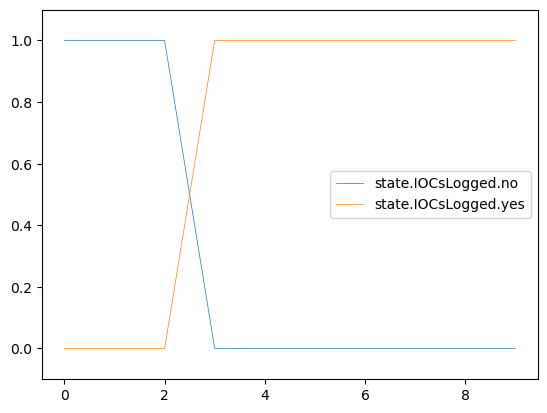

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                       file_write  
3       FileRecon                             none  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

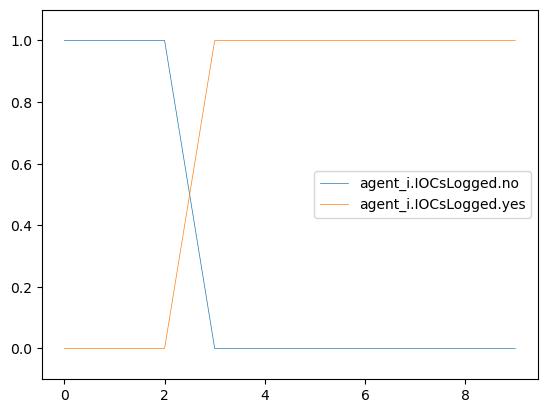

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes  agent_j.action  \
0               1.000000                0.000000    EnumAccounts   
1               0.981818                0.018182    EnumAccounts   
2               0.998972                0.001028      PrivEscAcc   
3               0.998459                0.001541       FileRecon   
4               0.998459                0.001541  ManipulateData   
5               0.998459                0.001541            Exit   
6               0.998459                0.001541             Nop   
7               0.998459                0.001541             Nop   
8               0.998459                0.001541             Nop   
9               0.998459                0.001541             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

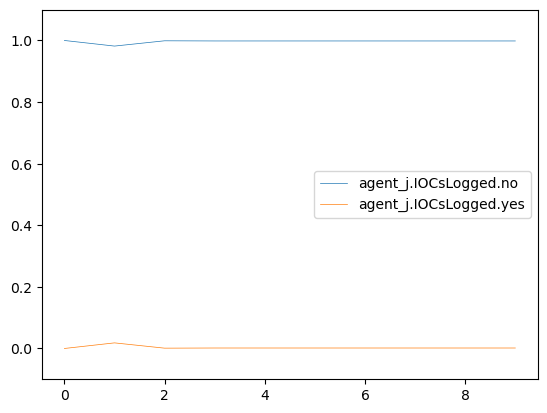

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

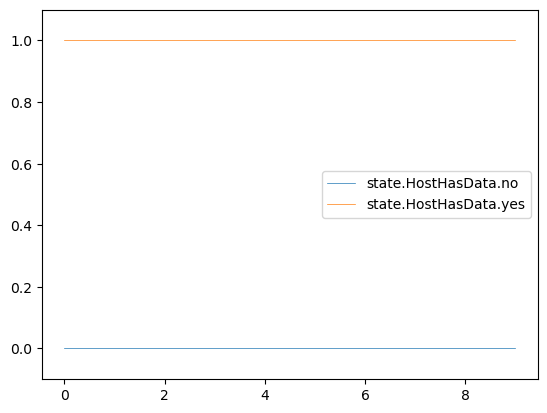

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                       file_write  
3       FileRecon                             none  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

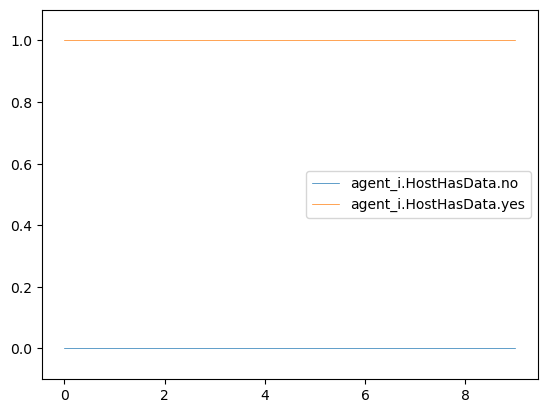

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000    EnumAccounts   
2                0.500000                 0.500000      PrivEscAcc   
3                0.500000                 0.500000       FileRecon   
4                0.071942                 0.928057  ManipulateData   
5                0.000040                 0.999960            Exit   
6                0.000040                 0.999960             Nop   
7                0.000040                 0.999960             Nop   
8                0.000040                 0.999960             Nop   
9                0.000040                 0.999960             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

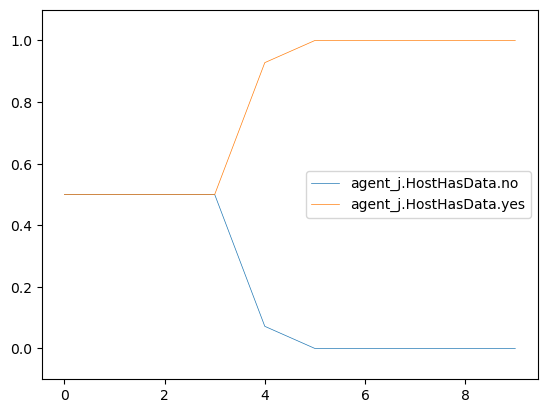

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0  RestrictAccPrivs    EnumAccounts
1                 0.0                  1.0      DecoyAccount    EnumAccounts
2                 0.0                  1.0           LogIOCs      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

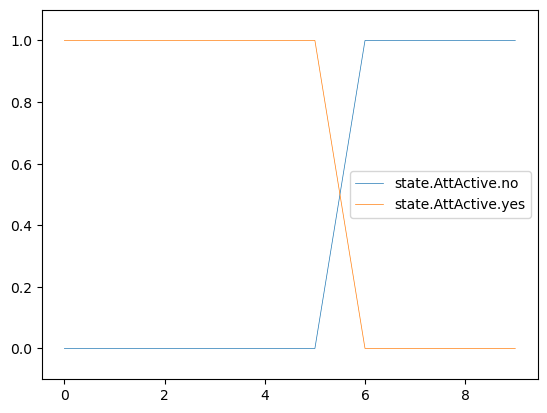

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000           1.000000e+00  RestrictAccPrivs   
1              0.000000           1.000000e+00      DecoyAccount   
2              0.016212           9.837883e-01           LogIOCs   
3              0.378739           6.212611e-01               Nop   
4              0.828864           1.711364e-01               Nop   
5              0.971372           2.862843e-02               Nop   
6              0.998600           1.399674e-03               Nop   
7              0.999955           4.500696e-05               Nop   
8              0.999993           7.043934e-06               Nop   
9              1.000000           1.663746e-07               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                       file_write  
3       FileRecon                             none  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

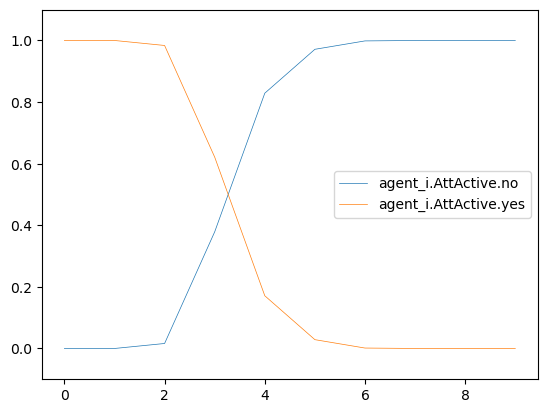

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

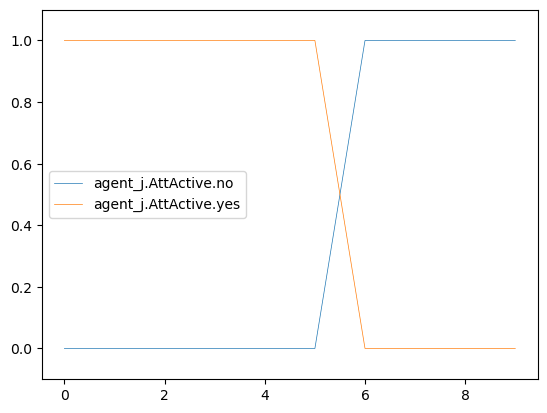

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

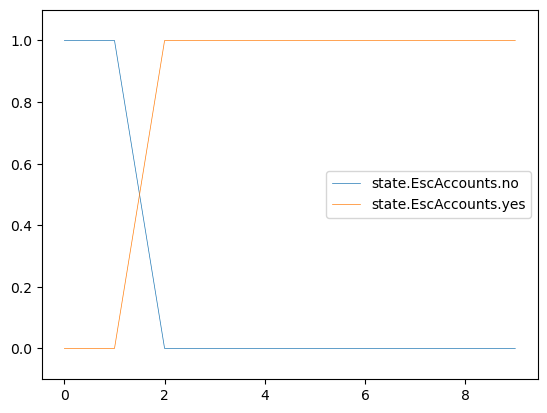

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                       file_write  
3       FileRecon                             none  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

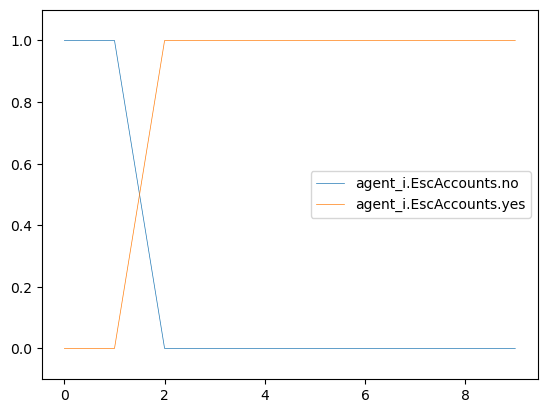

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.725806                 0.274194    EnumAccounts   
2                0.271739                 0.728261      PrivEscAcc   
3                0.000000                 1.000000       FileRecon   
4                0.000000                 1.000000  ManipulateData   
5                0.000000                 1.000000            Exit   
6                0.000000                 1.000000             Nop   
7                0.000000                 1.000000             Nop   
8                0.000000                 1.000000             Nop   
9                0.000000                 1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

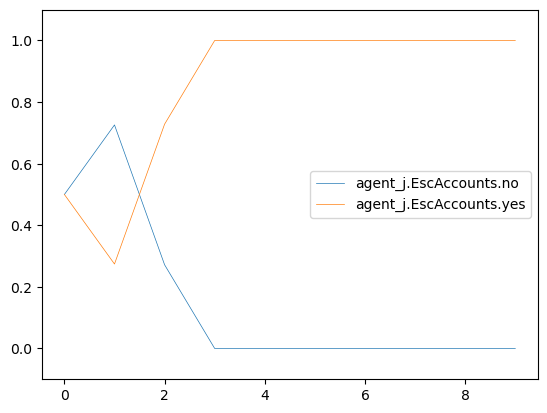

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

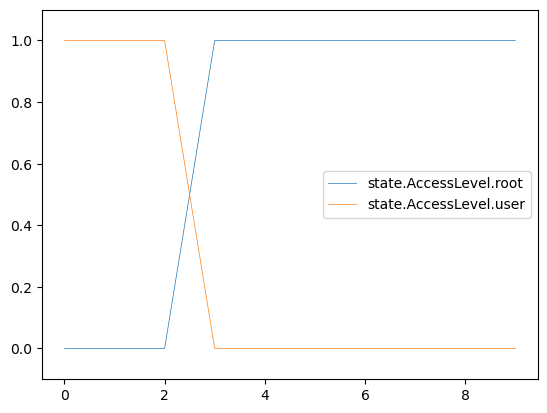

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000           LogIOCs   
3                  0.579095                  0.420905               Nop   
4                  0.170196                  0.829804               Nop   
5                  0.028490                  0.971510               Nop   
6                  0.020423                  0.979577               Nop   
7                  0.020158                  0.979842               Nop   
8                  0.020158                  0.979842               Nop   
9                  0.020157                  0.979843               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                       file_write  
3       FileRecon                             none  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

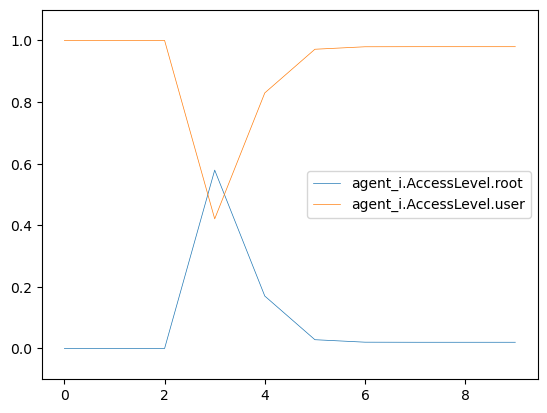

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0    EnumAccounts   
1                       0.0                       1.0    EnumAccounts   
2                       0.0                       1.0      PrivEscAcc   
3                       1.0                       0.0       FileRecon   
4                       1.0                       0.0  ManipulateData   
5                       1.0                       0.0            Exit   
6                       1.0                       0.0             Nop   
7                       1.0                       0.0             Nop   
8                       1.0                       0.0             Nop   
9                       1.0                       0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

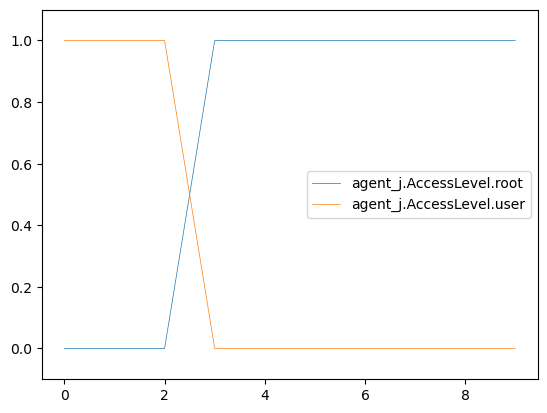

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

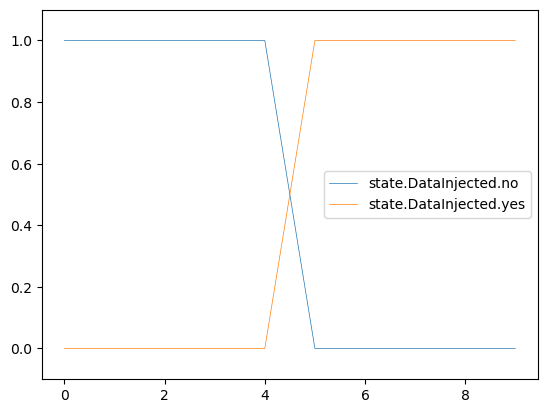

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.982317                  0.017683               Nop   
6                 0.981165                  0.018835               Nop   
7                 0.981127                  0.018873               Nop   
8                 0.981122                  0.018878               Nop   
9                 0.981122                  0.018878               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                       file_write  
3       FileRecon                             none  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

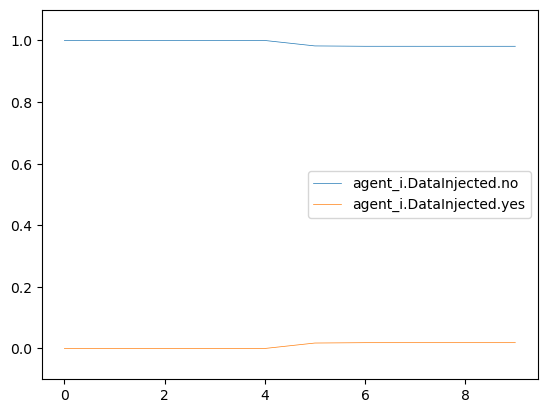

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000052                  0.999948            Exit   
6                 0.000052                  0.999948             Nop   
7                 0.000052                  0.999948             Nop   
8                 0.000052                  0.999948             Nop   
9                 0.000052                  0.999948             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

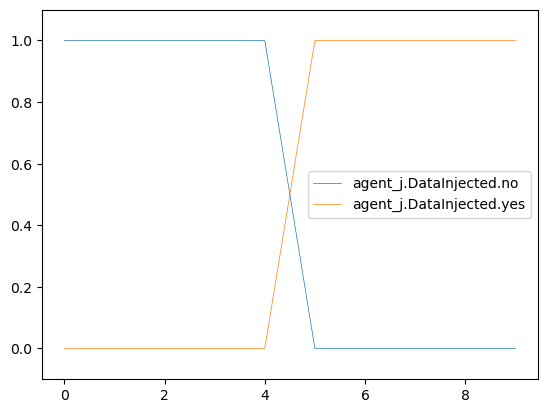

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0  RestrictAccPrivs    EnumAccounts  
1                      1.0      DecoyAccount    EnumAccounts  
2                      1.0           LogIOCs      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

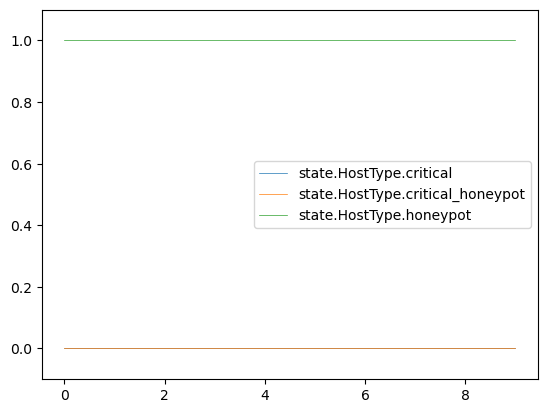

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0  RestrictAccPrivs    EnumAccounts   
1                        1.0      DecoyAccount    EnumAccounts   
2                        1.0           LogIOCs      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                       file_write  
3                             none  
4                             none  
5                             none  
6                             none  
7                   login_activity  
8                             none  
9                             none

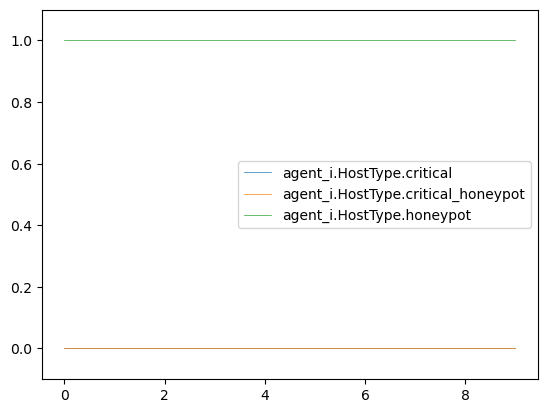

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0    EnumAccounts  RestrictAccPrivs   
1                        0.0    EnumAccounts      DecoyAccount   
2                        0.0      PrivEscAcc           LogIOCs   
3                        0.0       FileRecon               Nop   
4                        0.0  ManipulateData               Nop   
5                        0.0            Exit               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                         none   
4                            auth                         none   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           success                          active   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

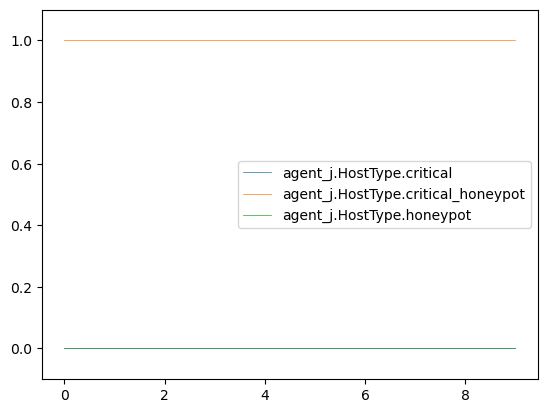

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0  RestrictAccPrivs    EnumAccounts
1                1.0                 0.0      DecoyAccount    EnumAccounts
2                0.0                 1.0           LogIOCs      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

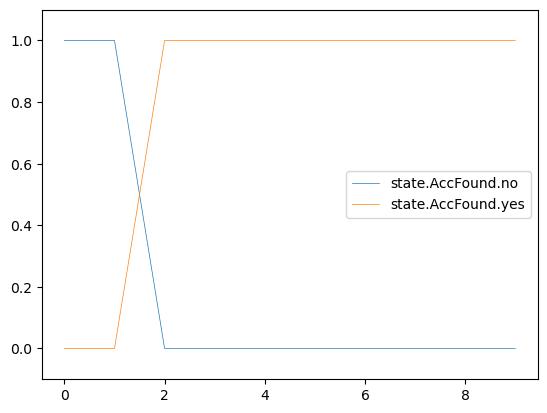

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000  RestrictAccPrivs   
1             1.000000              0.000000      DecoyAccount   
2             0.322696              0.677304           LogIOCs   
3             0.313021              0.686979               Nop   
4             0.628791              0.371209               Nop   
5             0.735872              0.264128               Nop   
6             0.742048              0.257952               Nop   
7             0.742249              0.257751               Nop   
8             0.742249              0.257751               Nop   
9             0.742249              0.257751               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                       file_write  
3       FileRecon                             none  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

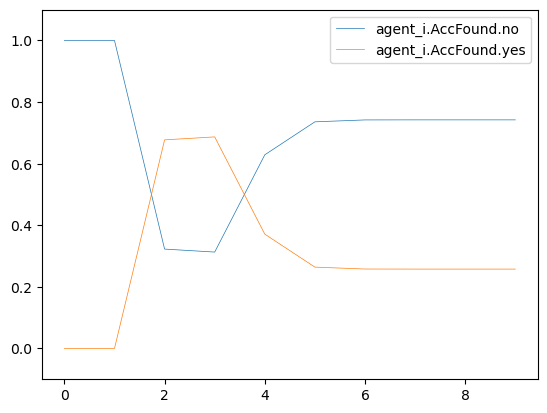

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.943548              0.056452    EnumAccounts   
2             0.296196              0.703804      PrivEscAcc   
3             0.000000              1.000000       FileRecon   
4             0.000000              1.000000  ManipulateData   
5             0.000000              1.000000            Exit   
6             0.000000              1.000000             Nop   
7             0.000000              1.000000             Nop   
8             0.000000              1.000000             Nop   
9             0.000000              1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

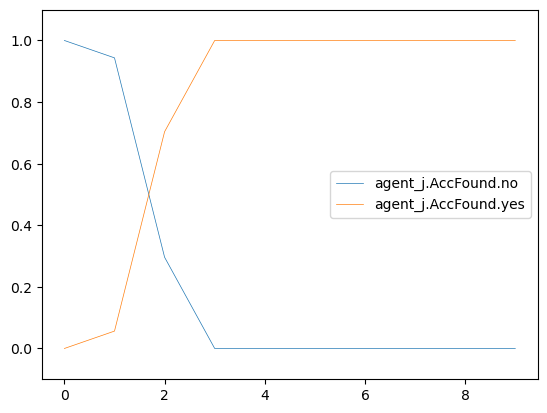

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0  RestrictAccPrivs    EnumAccounts
1                 1.0                  0.0      DecoyAccount    EnumAccounts
2                 1.0                  0.0           LogIOCs      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

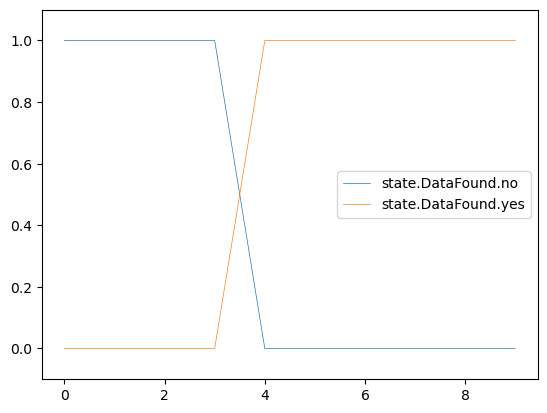

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000               Nop   
4              0.882628               0.117372               Nop   
5              0.974457               0.025543               Nop   
6              0.980888               0.019112               Nop   
7              0.981099               0.018901               Nop   
8              0.981099               0.018901               Nop   
9              0.981099               0.018901               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                       file_write  
3       FileRecon                             none  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

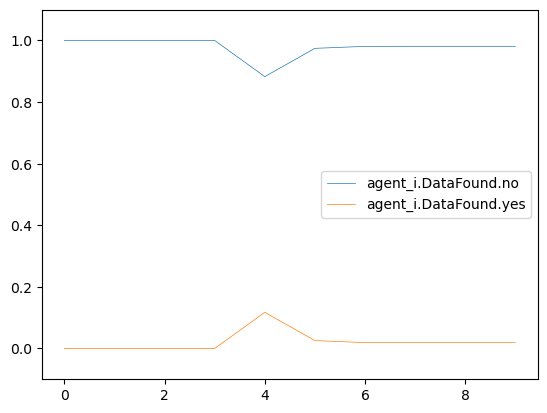

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000    EnumAccounts   
2              1.000000               0.000000      PrivEscAcc   
3              1.000000               0.000000       FileRecon   
4              0.093525               0.906475  ManipulateData   
5              0.000052               0.999948            Exit   
6              0.000052               0.999948             Nop   
7              0.000052               0.999948             Nop   
8              0.000052               0.999948             Nop   
9              0.000052               0.999948             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

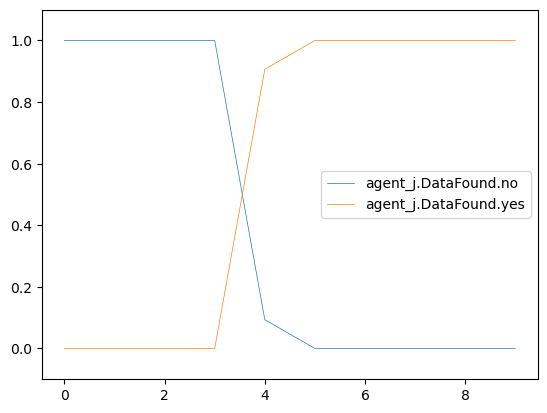

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   0.0                   1.0  RestrictAccPrivs   
1                   1.0                   0.0      DecoyAccount   
2                   1.0                   0.0           LogIOCs   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

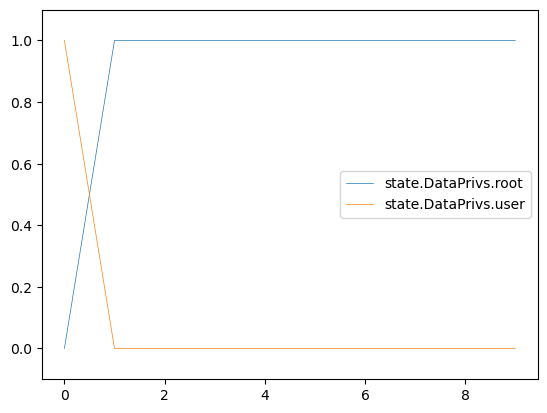

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                       file_write  
3       FileRecon                             none  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                   login_activity  
8             Nop                             none  
9             Nop                             none

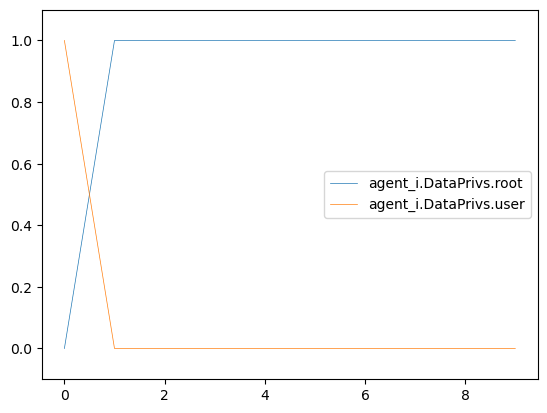

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.990909                0.009091    EnumAccounts   
2                1.000000                0.000000      PrivEscAcc   
3                1.000000                0.000000       FileRecon   
4                1.000000                0.000000  ManipulateData   
5                1.000000                0.000000            Exit   
6                1.000000                0.000000             Nop   
7                1.000000                0.000000             Nop   
8                1.000000                0.000000             Nop   
9                1.000000                0.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

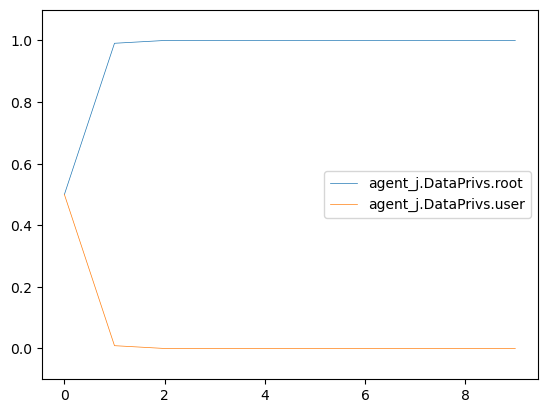

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                             none
5                               1.0                             none
6                               1.0                        file_enum
7                               1.0                             none
8                               1.0                        file_enum
9                               1.0                             none

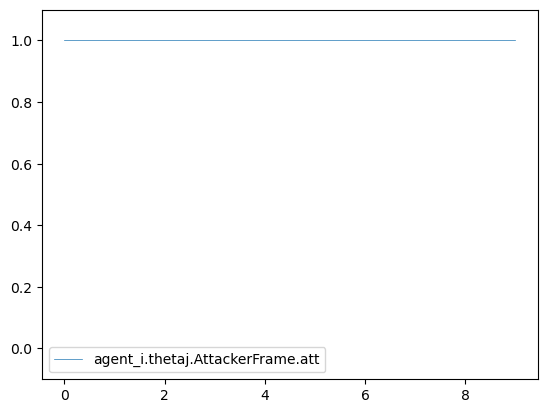

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.345454                        0.654545   
2                         0.334019                        0.665982   
3                         0.334019                        0.665982   
4                         0.334019                        0.665982   
5                         0.334019                        0.665982   
6                         0.334019                        0.665982   
7                         0.334019                        0.665982   
8                         0.334019                        0.665982   
9                         0.334019                        0.665982   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                         none   
7                          denied                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

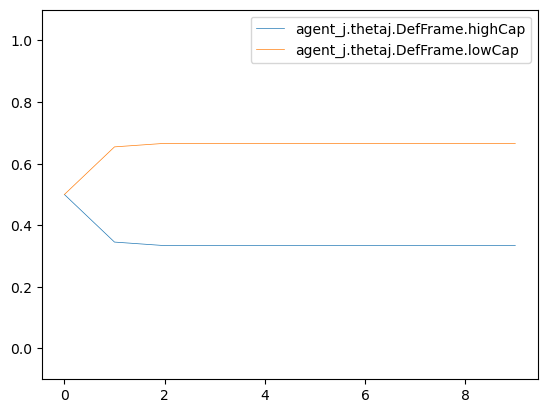

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action agent_j.action
0                  1.0                   0.0  RestrictAccPrivs   EnumAccounts
1                  1.0                   0.0      DecoyAccount   EnumAccounts
2                  1.0                   0.0           LogIOCs           Exit
3                  0.0                   1.0               Nop            Nop
4                  0.0                   1.0               Nop            Nop
5                  0.0                   1.0               Nop            Nop
6                  0.0                   1.0               Nop            Nop
7                  0.0                   1.0               Nop            Nop
8                  0.0                   1.0               Nop            Nop
9                  0.0                   1.0               Nop            Nop

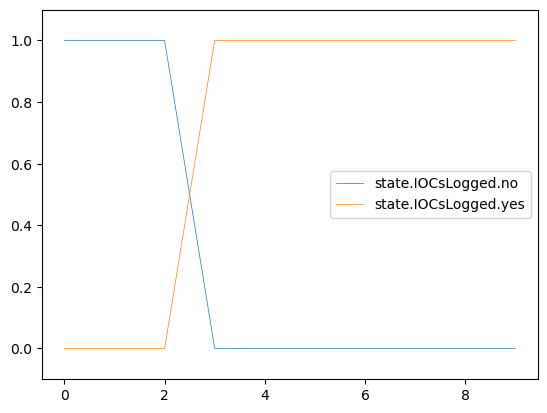

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

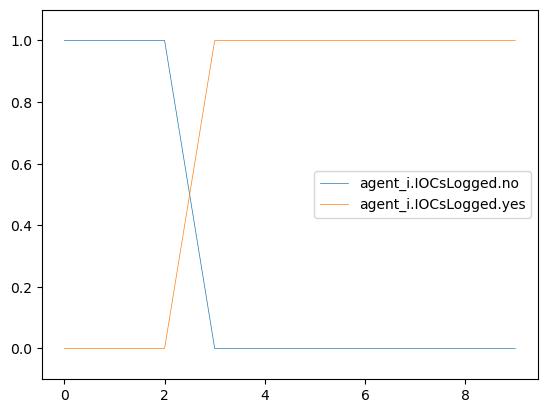

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.981818                0.018182   EnumAccounts   
2               0.998972                0.001028           Exit   
3               0.998972                0.001028            Nop   
4               0.998972                0.001028            Nop   
5               0.998972                0.001028            Nop   
6               0.998972                0.001028            Nop   
7               0.998972                0.001028            Nop   
8               0.998972                0.001028            Nop   
9               0.998972                0.001028            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

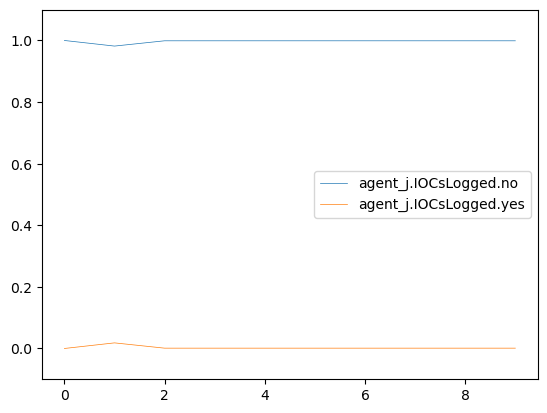

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

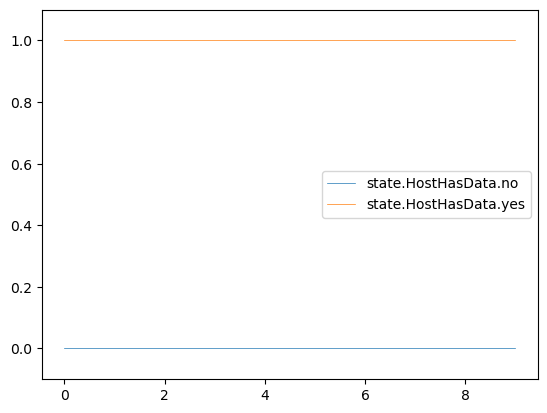

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

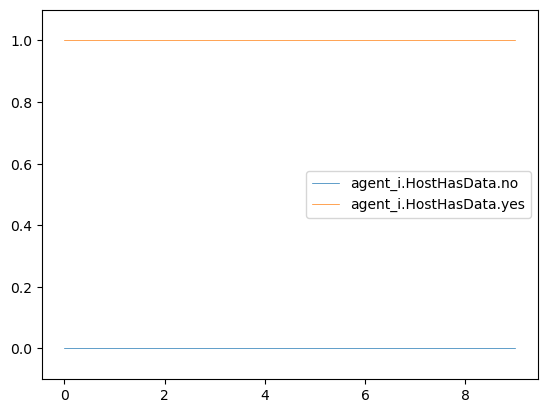

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5   EnumAccounts   
2                     0.5                      0.5           Exit   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

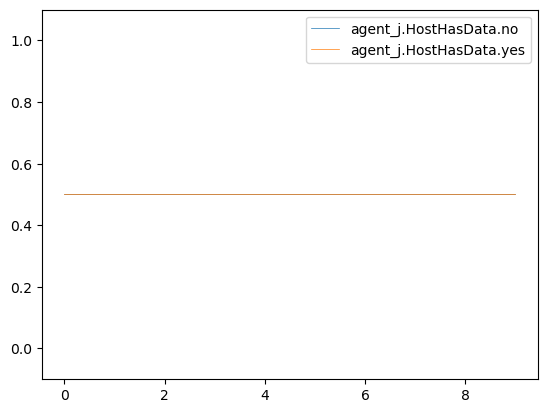

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action agent_j.action
0                 0.0                  1.0  RestrictAccPrivs   EnumAccounts
1                 0.0                  1.0      DecoyAccount   EnumAccounts
2                 0.0                  1.0           LogIOCs           Exit
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

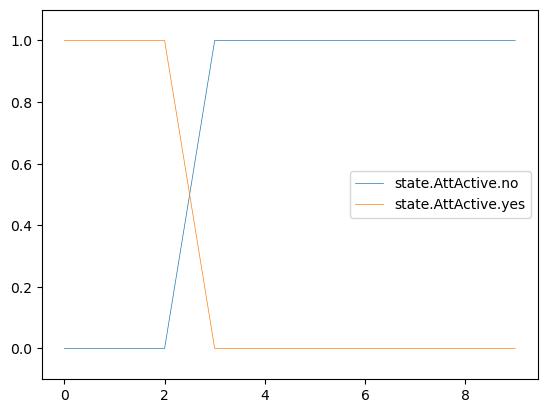

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000  RestrictAccPrivs   
1              0.000000               1.000000      DecoyAccount   
2              0.016212               0.983788           LogIOCs   
3              0.349734               0.650266               Nop   
4              0.095918               0.904082               Nop   
5              0.427867               0.572133               Nop   
6              0.966878               0.033122               Nop   
7              0.985767               0.014233               Nop   
8              0.999161               0.000839               Nop   
9              0.999830               0.000171               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

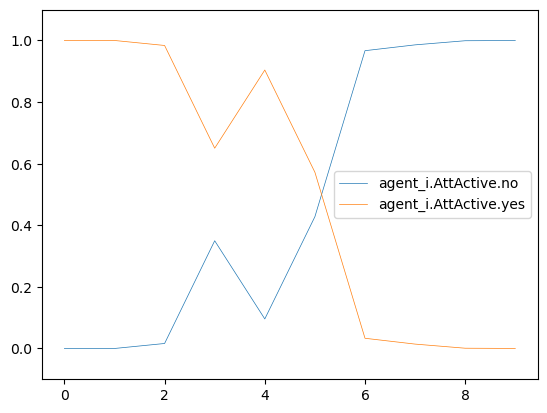

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0   EnumAccounts   
2                   0.0                    1.0           Exit   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

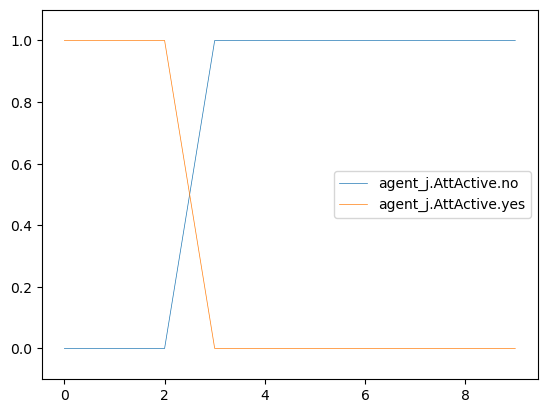

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

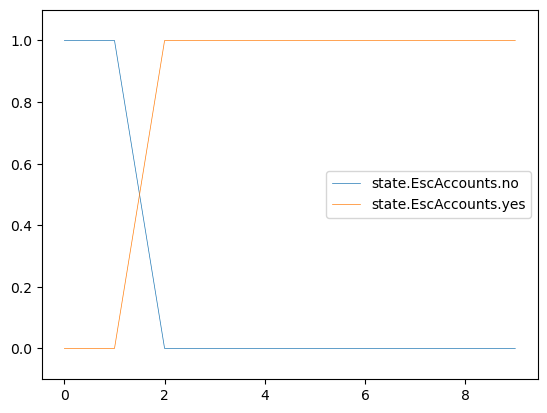

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

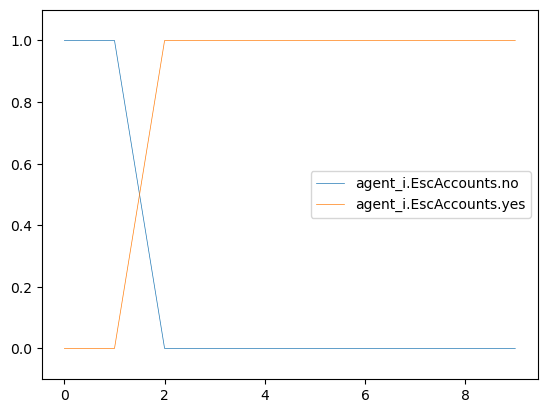

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194   EnumAccounts   
2                0.891285                 0.108715           Exit   
3                0.890369                 0.109631            Nop   
4                0.890369                 0.109631            Nop   
5                0.890369                 0.109631            Nop   
6                0.890369                 0.109631            Nop   
7                0.890369                 0.109631            Nop   
8                0.890369                 0.109631            Nop   
9                0.890369                 0.109631            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

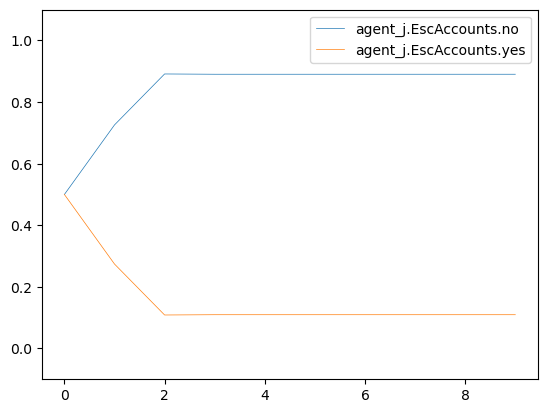

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0           LogIOCs   
3                     0.0                     1.0               Nop   
4                     0.0                     1.0               Nop   
5                     0.0                     1.0               Nop   
6                     0.0                     1.0               Nop   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

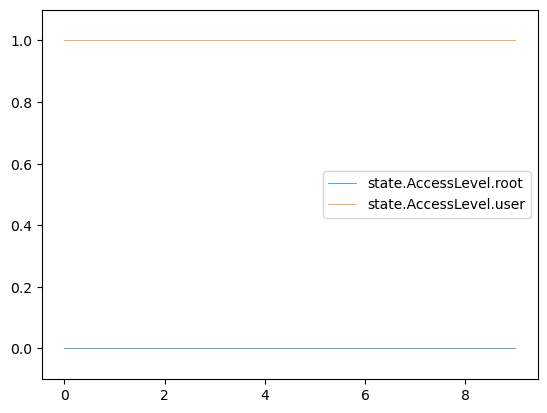

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000           LogIOCs   
3                  0.534745                  0.465255               Nop   
4                  0.902823                  0.097177               Nop   
5                  0.571719                  0.428281               Nop   
6                  0.486931                  0.513069               Nop   
7                  0.490535                  0.509465               Nop   
8                  0.487970                  0.512030               Nop   
9                  0.488034                  0.511966               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

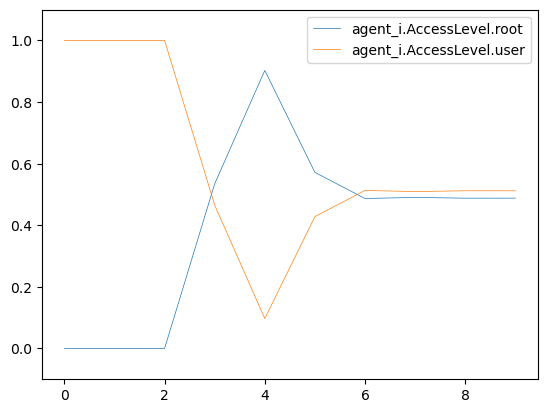

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0           Exit   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

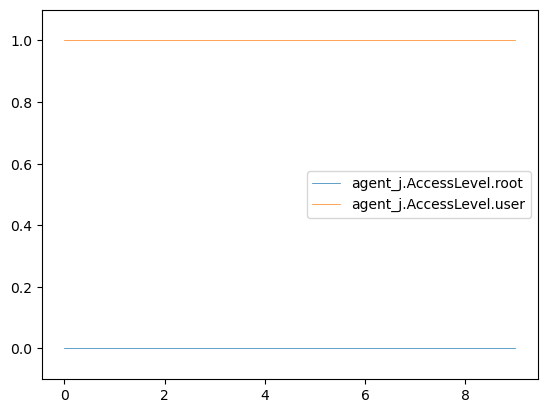

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

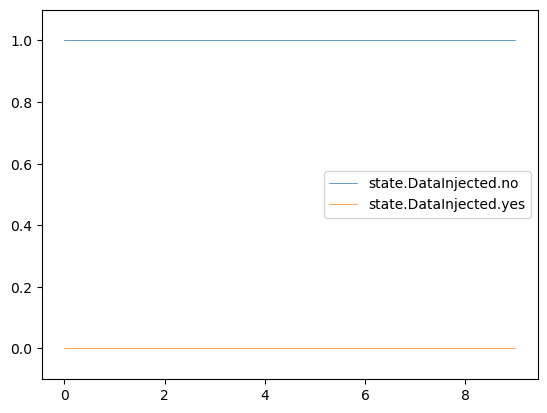

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.645153                  0.354847               Nop   
6                 0.550689                  0.449311               Nop   
7                 0.547766                  0.452234               Nop   
8                 0.544898                  0.455102               Nop   
9                 0.544926                  0.455074               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

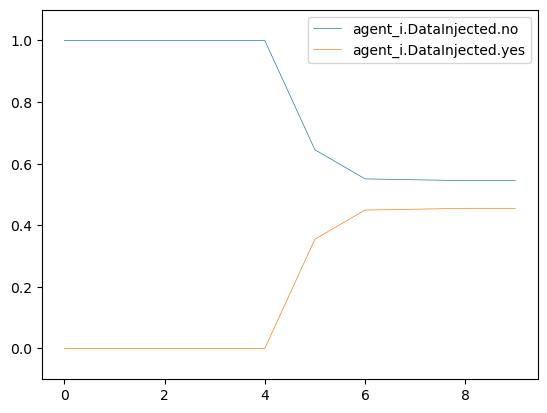

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0           Exit   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

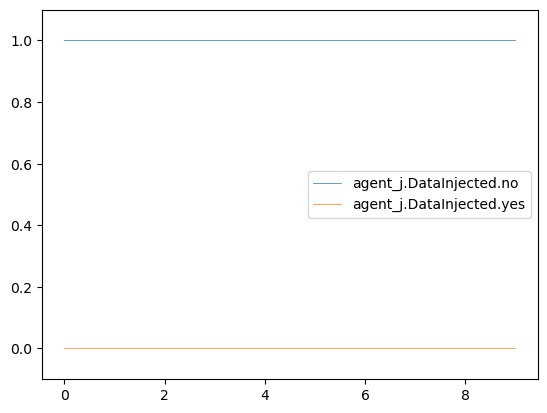

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action agent_j.action  
0                      1.0  RestrictAccPrivs   EnumAccounts  
1                      1.0      DecoyAccount   EnumAccounts  
2                      1.0           LogIOCs           Exit  
3                      1.0               Nop            Nop  
4                      1.0               Nop            Nop  
5                      1.0               Nop            Nop  
6                      1.0               Nop            Nop  
7                      1.0               Nop            Nop  
8                      1.0               Nop            Nop  
9                      1.0               Nop            Nop

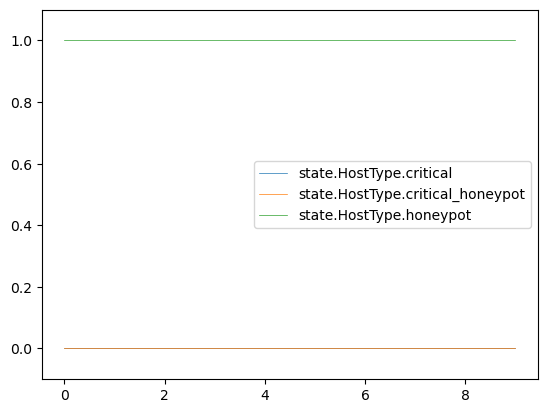

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action agent_j.action  \
0                        1.0  RestrictAccPrivs   EnumAccounts   
1                        1.0      DecoyAccount   EnumAccounts   
2                        1.0           LogIOCs           Exit   
3                        1.0               Nop            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                             none  
5                             none  
6                        file_enum  
7                             none  
8                        file_enum  
9                             none

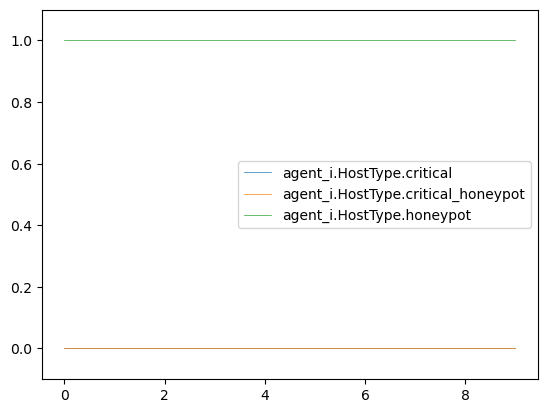

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action    agent_i.action  \
0                        0.0   EnumAccounts  RestrictAccPrivs   
1                        0.0   EnumAccounts      DecoyAccount   
2                        0.0           Exit           LogIOCs   
3                        0.0            Nop               Nop   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                         none   
7                          denied                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

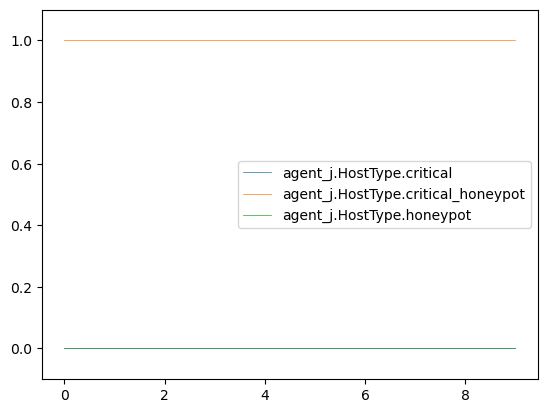

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action agent_j.action
0                1.0                 0.0  RestrictAccPrivs   EnumAccounts
1                1.0                 0.0      DecoyAccount   EnumAccounts
2                1.0                 0.0           LogIOCs           Exit
3                1.0                 0.0               Nop            Nop
4                1.0                 0.0               Nop            Nop
5                1.0                 0.0               Nop            Nop
6                1.0                 0.0               Nop            Nop
7                1.0                 0.0               Nop            Nop
8                1.0                 0.0               Nop            Nop
9                1.0                 0.0               Nop            Nop

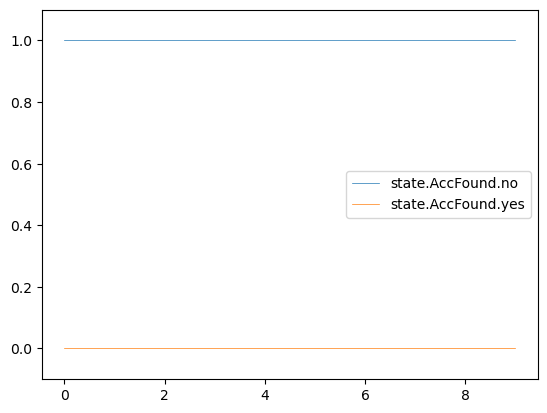

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action agent_j.action  \
0             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
1             1.000000              0.000000      DecoyAccount   EnumAccounts   
2             0.322696              0.677304           LogIOCs           Exit   
3             0.312023              0.687977               Nop            Nop   
4             0.074142              0.925858               Nop            Nop   
5             0.325881              0.674119               Nop            Nop   
6             0.390632              0.609368               Nop            Nop   
7             0.387888              0.612112               Nop            Nop   
8             0.389841              0.610159               Nop            Nop   
9             0.389793              0.610208               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                             none  
5                             none  
6                        file_enum  
7                             none  
8                        file_enum  
9                             none

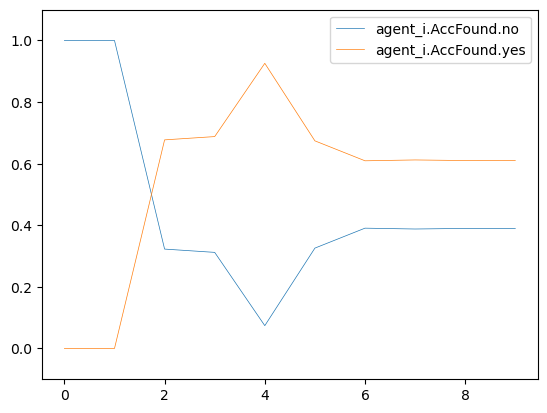

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action    agent_i.action  \
0             1.000000              0.000000   EnumAccounts  RestrictAccPrivs   
1             0.943548              0.056452   EnumAccounts      DecoyAccount   
2             0.971501              0.028499           Exit           LogIOCs   
3             0.971501              0.028499            Nop               Nop   
4             0.971501              0.028499            Nop               Nop   
5             0.971501              0.028499            Nop               Nop   
6             0.971501              0.028499            Nop               Nop   
7             0.971501              0.028499            Nop               Nop   
8             0.971501              0.028499            Nop               Nop   
9             0.971501              0.028499            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                          denied                         none   
3                            auth                         none   
4                            auth                   user_files   
5                            auth                         none   
6                            auth                         none   
7                          denied                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

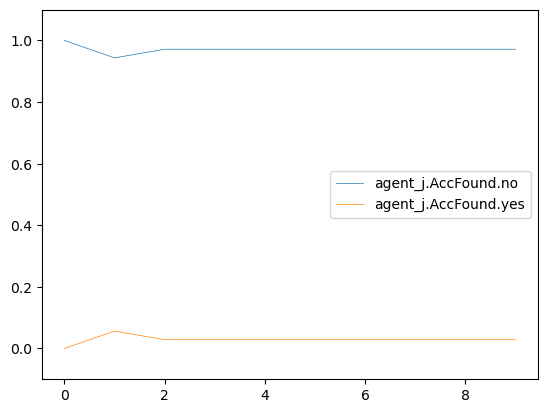

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action agent_j.action
0                 1.0                  0.0  RestrictAccPrivs   EnumAccounts
1                 1.0                  0.0      DecoyAccount   EnumAccounts
2                 1.0                  0.0           LogIOCs           Exit
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

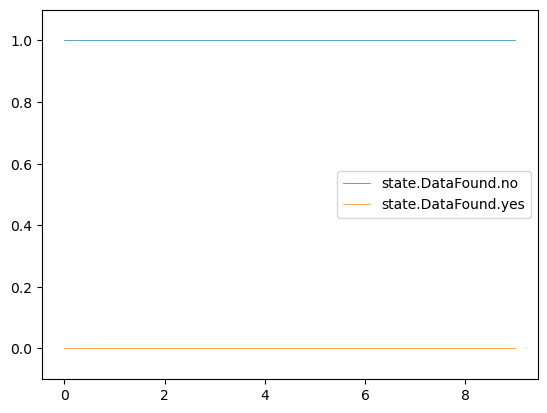

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000               Nop   
4              0.377386               0.622614               Nop   
5              0.487428               0.512572               Nop   
6              0.544088               0.455912               Nop   
7              0.541368               0.458632               Nop   
8              0.543795               0.456205               Nop   
9              0.543748               0.456252               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

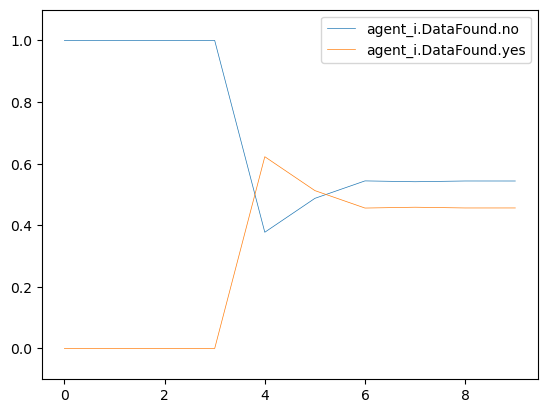

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0   EnumAccounts   
2                   1.0                    0.0           Exit   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

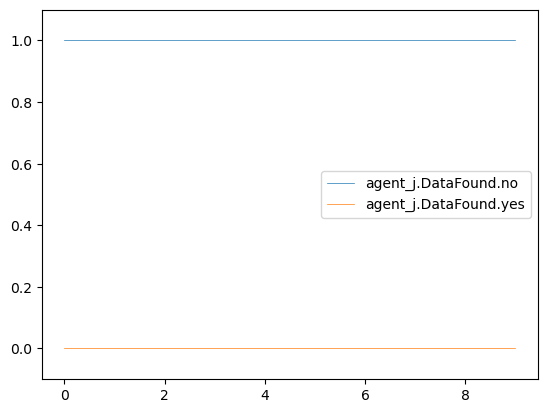

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action agent_j.action
0                   0.0                   1.0  RestrictAccPrivs   EnumAccounts
1                   1.0                   0.0      DecoyAccount   EnumAccounts
2                   1.0                   0.0           LogIOCs           Exit
3                   1.0                   0.0               Nop            Nop
4                   1.0                   0.0               Nop            Nop
5                   1.0                   0.0               Nop            Nop
6                   1.0                   0.0               Nop            Nop
7                   1.0                   0.0               Nop            Nop
8                   1.0                   0.0               Nop            Nop
9                   1.0                   0.0               Nop            Nop

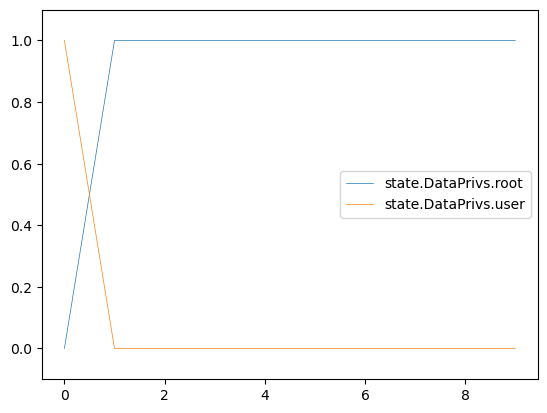

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2           Exit                        file_enum  
3            Nop                        file_enum  
4            Nop                             none  
5            Nop                             none  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

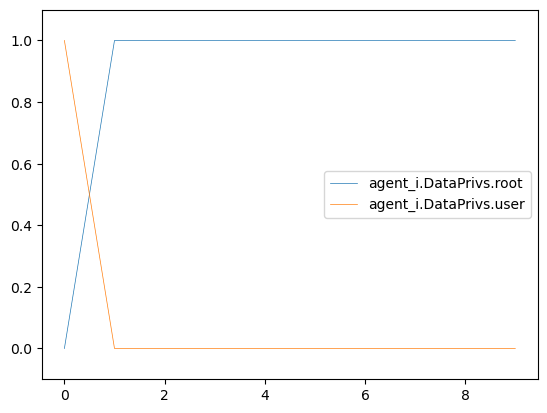

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.990909                0.009091   EnumAccounts   
2                1.000000                0.000000           Exit   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2           LogIOCs                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

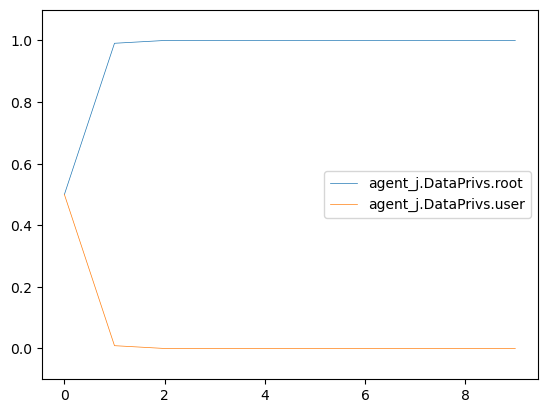

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                             none
2                               1.0                        file_enum
3                               1.0                   login_activity
4                               1.0                             none
5                               1.0                       file_write
6                               1.0                        file_enum
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

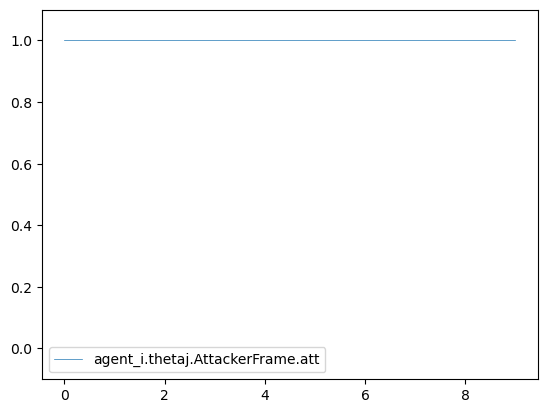

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.904762                        0.095238   
4                         0.904762                        0.095238   
5                         0.904762                        0.095238   
6                         0.904762                        0.095238   
7                         0.904762                        0.095238   
8                         0.904762                        0.095238   
9                         0.904762                        0.095238   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                   user_files   
2                          denied                         none   
3                          denied                   user_files   
4                            auth                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                            auth                         none   
8                          denied                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

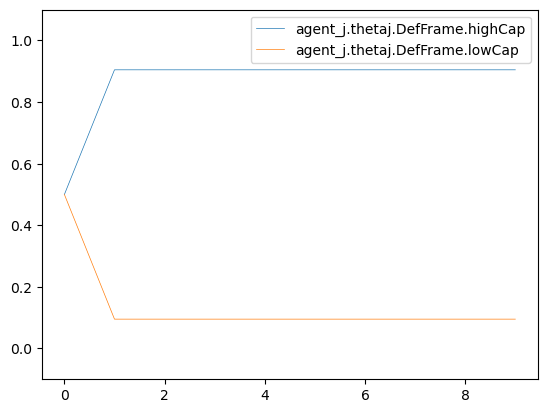

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action agent_j.action
0                  1.0                   0.0  RestrictAccPrivs   EnumAccounts
1                  1.0                   0.0      DecoyAccount           Exit
2                  1.0                   0.0           LogIOCs            Nop
3                  0.0                   1.0               Nop            Nop
4                  0.0                   1.0               Nop            Nop
5                  0.0                   1.0               Nop            Nop
6                  0.0                   1.0               Nop            Nop
7                  0.0                   1.0               Nop            Nop
8                  0.0                   1.0               Nop            Nop
9                  0.0                   1.0               Nop            Nop

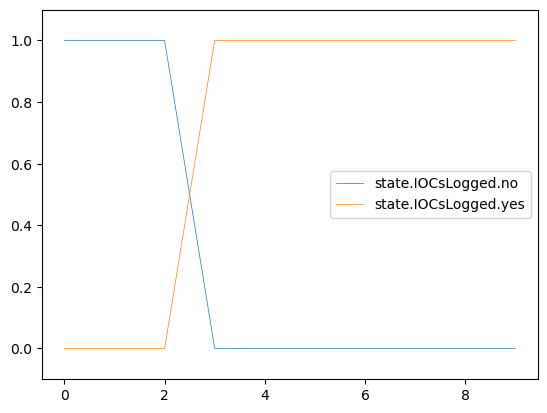

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

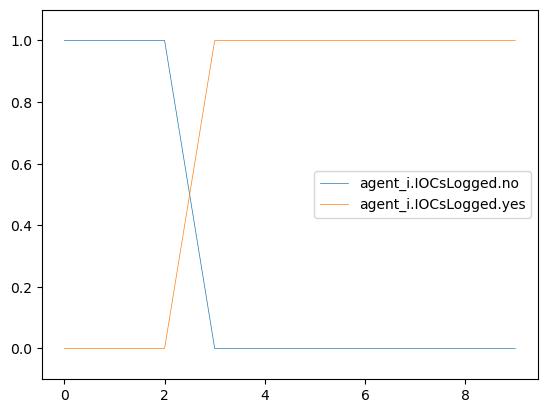

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.142857                0.857143           Exit   
2               0.142857                0.857143            Nop   
3               0.142857                0.857143            Nop   
4               0.142857                0.857143            Nop   
5               0.142857                0.857143            Nop   
6               0.142857                0.857143            Nop   
7               0.142857                0.857143            Nop   
8               0.142857                0.857143            Nop   
9               0.142857                0.857143            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                            auth   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

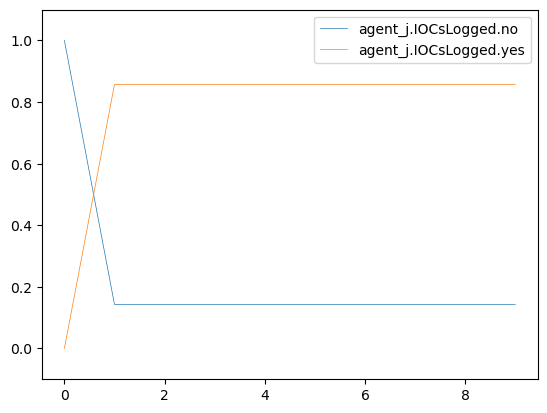

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

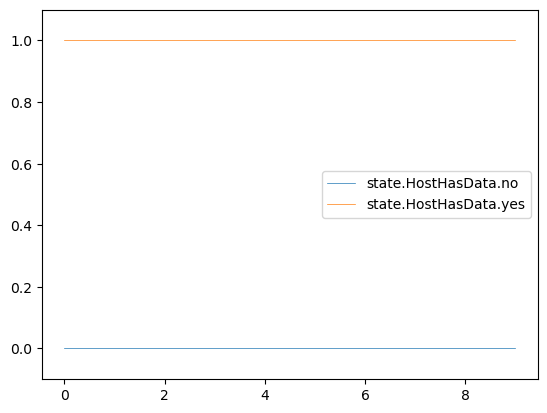

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

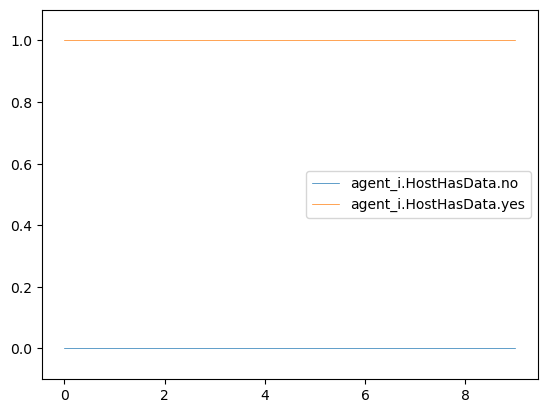

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5           Exit   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                            auth   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

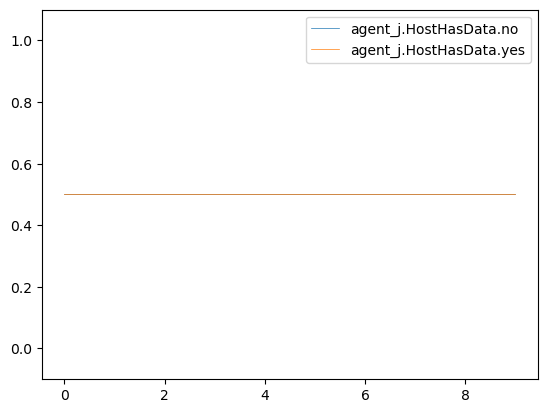

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action agent_j.action
0                 0.0                  1.0  RestrictAccPrivs   EnumAccounts
1                 0.0                  1.0      DecoyAccount           Exit
2                 1.0                  0.0           LogIOCs            Nop
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

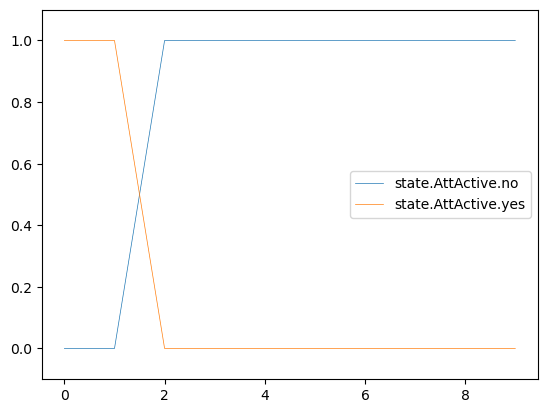

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000  RestrictAccPrivs   
1              0.000000               1.000000      DecoyAccount   
2              0.415625               0.584375           LogIOCs   
3              0.469621               0.530379               Nop   
4              0.279908               0.720093               Nop   
5              0.755139               0.244861               Nop   
6              0.425332               0.574668               Nop   
7              0.818507               0.181493               Nop   
8              0.978195               0.021805               Nop   
9              0.999474               0.000526               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

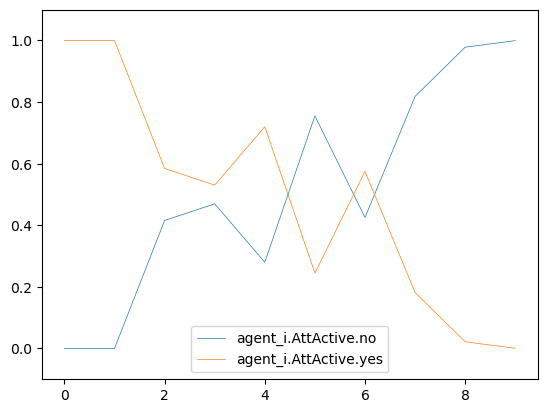

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                            auth   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

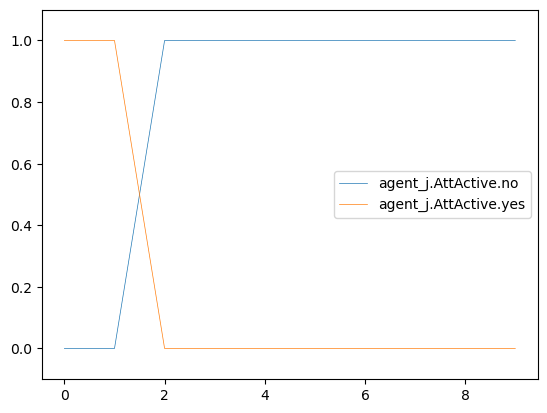

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

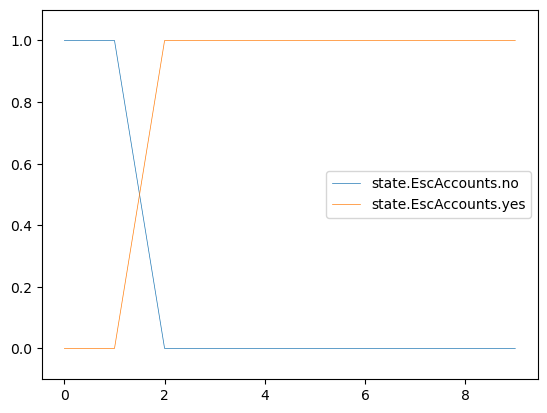

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

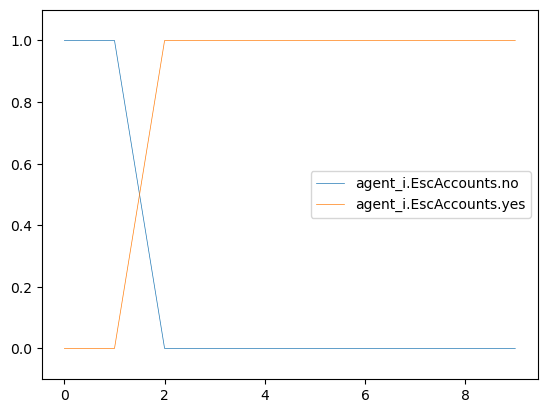

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194           Exit   
2                0.725806                 0.274194            Nop   
3                0.103687                 0.896313            Nop   
4                0.103687                 0.896313            Nop   
5                0.103687                 0.896313            Nop   
6                0.103687                 0.896313            Nop   
7                0.103687                 0.896313            Nop   
8                0.103687                 0.896313            Nop   
9                0.103687                 0.896313            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                            auth   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

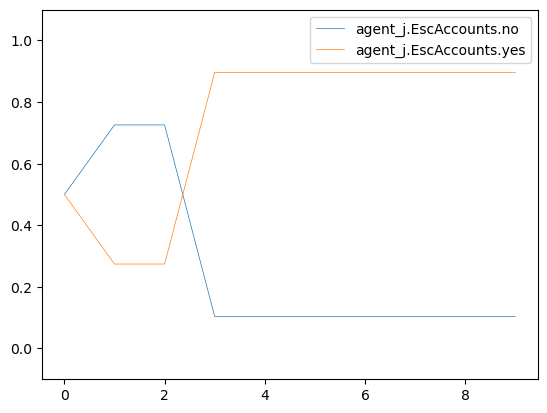

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0           LogIOCs   
3                     0.0                     1.0               Nop   
4                     0.0                     1.0               Nop   
5                     0.0                     1.0               Nop   
6                     0.0                     1.0               Nop   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

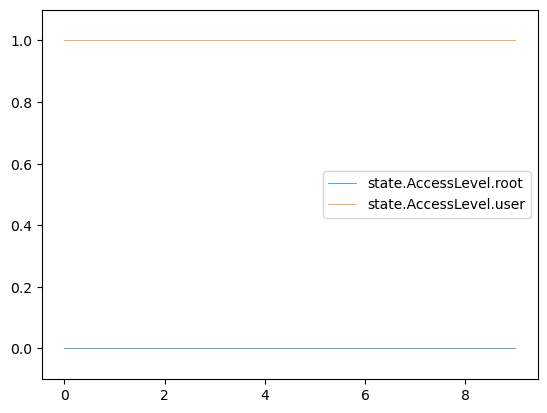

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000           LogIOCs   
3                  0.232399                  0.767601               Nop   
4                  0.684053                  0.315947               Nop   
5                  0.241291                  0.758709               Nop   
6                  0.588922                  0.411078               Nop   
7                  0.644204                  0.355796               Nop   
8                  0.597669                  0.402331               Nop   
9                  0.596400                  0.403600               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

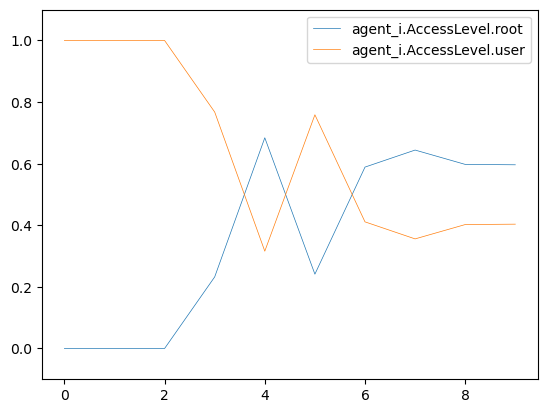

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                            auth   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

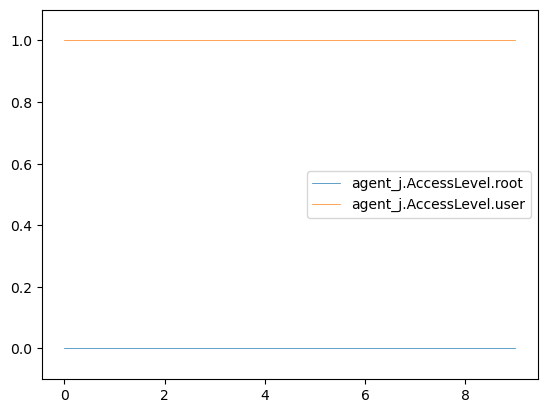

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

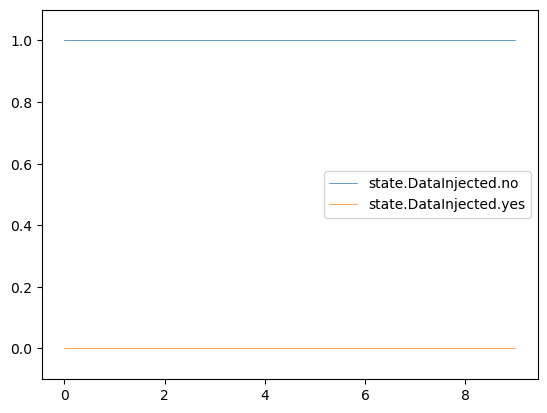

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.975314                  0.024686               Nop   
6                 0.466082                  0.533918               Nop   
7                 0.511070                  0.488930               Nop   
8                 0.433733                  0.566267               Nop   
9                 0.431558                  0.568442               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

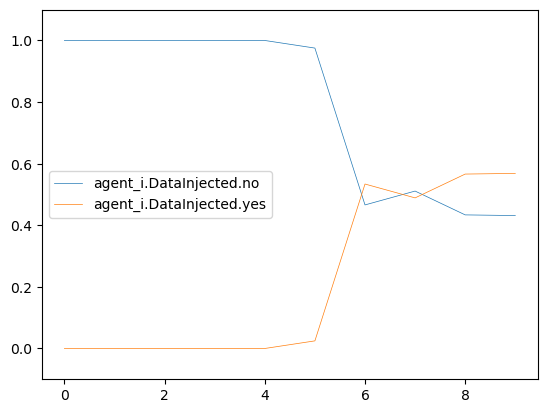

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                            auth   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

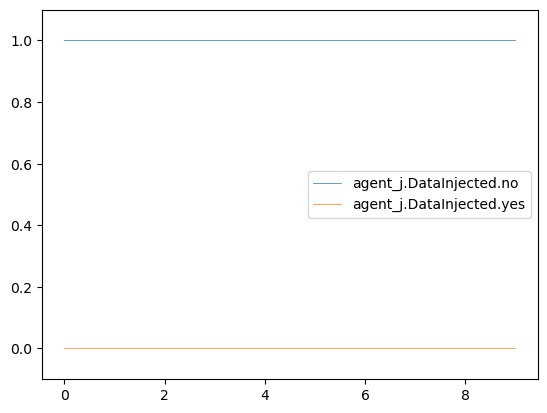

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action agent_j.action  
0                      1.0  RestrictAccPrivs   EnumAccounts  
1                      1.0      DecoyAccount           Exit  
2                      1.0           LogIOCs            Nop  
3                      1.0               Nop            Nop  
4                      1.0               Nop            Nop  
5                      1.0               Nop            Nop  
6                      1.0               Nop            Nop  
7                      1.0               Nop            Nop  
8                      1.0               Nop            Nop  
9                      1.0               Nop            Nop

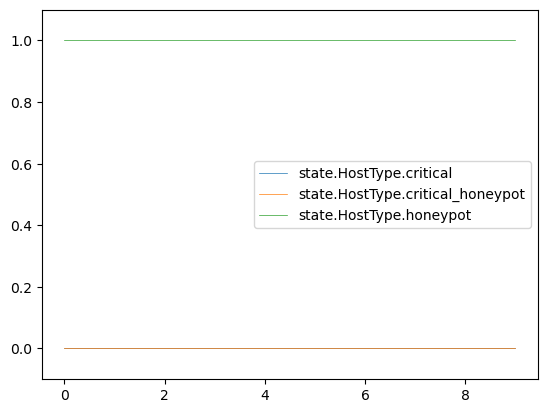

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action agent_j.action  \
0                        1.0  RestrictAccPrivs   EnumAccounts   
1                        1.0      DecoyAccount           Exit   
2                        1.0           LogIOCs            Nop   
3                        1.0               Nop            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                        file_enum  
3                   login_activity  
4                             none  
5                       file_write  
6                        file_enum  
7                             none  
8                             none  
9                             none

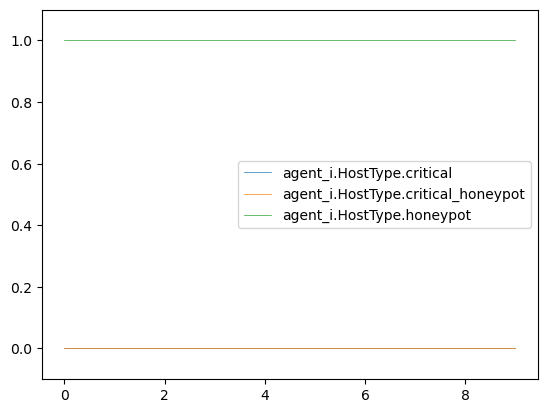

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action    agent_i.action  \
0                        0.0   EnumAccounts  RestrictAccPrivs   
1                        0.0           Exit      DecoyAccount   
2                        0.0            Nop           LogIOCs   
3                        0.0            Nop               Nop   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                   user_files   
2                          denied                         none   
3                          denied                   user_files   
4                            auth                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                            auth                         none   
8                          denied                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

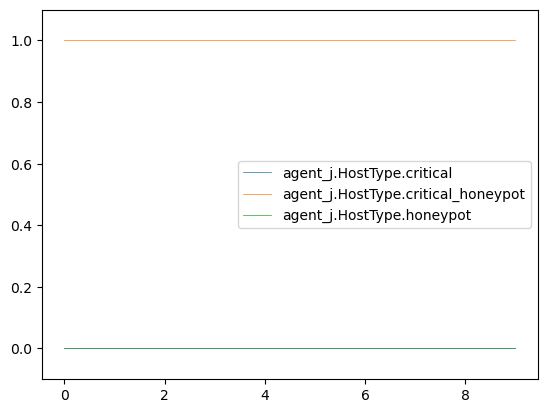

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action agent_j.action
0                1.0                 0.0  RestrictAccPrivs   EnumAccounts
1                1.0                 0.0      DecoyAccount           Exit
2                1.0                 0.0           LogIOCs            Nop
3                1.0                 0.0               Nop            Nop
4                1.0                 0.0               Nop            Nop
5                1.0                 0.0               Nop            Nop
6                1.0                 0.0               Nop            Nop
7                1.0                 0.0               Nop            Nop
8                1.0                 0.0               Nop            Nop
9                1.0                 0.0               Nop            Nop

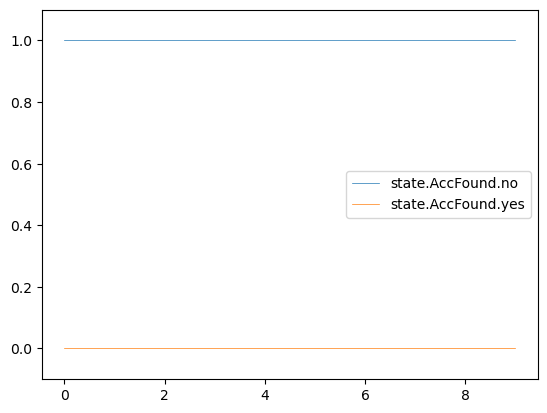

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action agent_j.action  \
0             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
1             1.000000              0.000000      DecoyAccount           Exit   
2             0.645625              0.354375           LogIOCs            Nop   
3             0.537919              0.462081               Nop            Nop   
4             0.288013              0.711987               Nop            Nop   
5             0.687237              0.312763               Nop            Nop   
6             0.373461              0.626539               Nop            Nop   
7             0.323226              0.676774               Nop            Nop   
8             0.365513              0.634487               Nop            Nop   
9             0.366666              0.633334               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                        file_enum  
3                   login_activity  
4                             none  
5                       file_write  
6                        file_enum  
7                             none  
8                             none  
9                             none

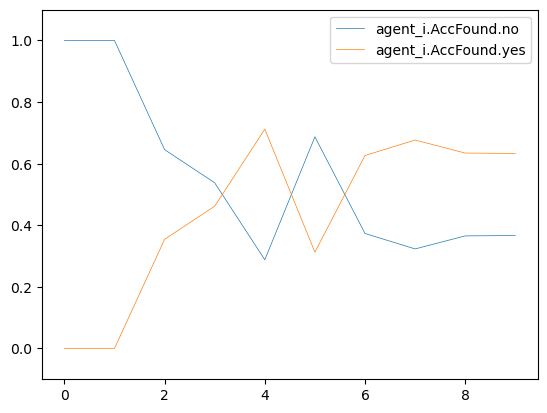

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action    agent_i.action  \
0             1.000000              0.000000   EnumAccounts  RestrictAccPrivs   
1             0.943548              0.056452           Exit      DecoyAccount   
2             0.943548              0.056452            Nop           LogIOCs   
3             0.943548              0.056452            Nop               Nop   
4             0.943548              0.056452            Nop               Nop   
5             0.943548              0.056452            Nop               Nop   
6             0.943548              0.056452            Nop               Nop   
7             0.943548              0.056452            Nop               Nop   
8             0.943548              0.056452            Nop               Nop   
9             0.943548              0.056452            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                            auth                   user_files   
2                          denied                         none   
3                          denied                   user_files   
4                            auth                         none   
5                          denied                   user_files   
6                          denied                   user_files   
7                            auth                         none   
8                          denied                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

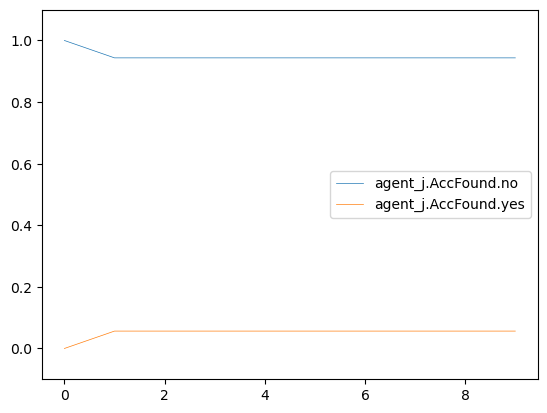

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action agent_j.action
0                 1.0                  0.0  RestrictAccPrivs   EnumAccounts
1                 1.0                  0.0      DecoyAccount           Exit
2                 1.0                  0.0           LogIOCs            Nop
3                 1.0                  0.0               Nop            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

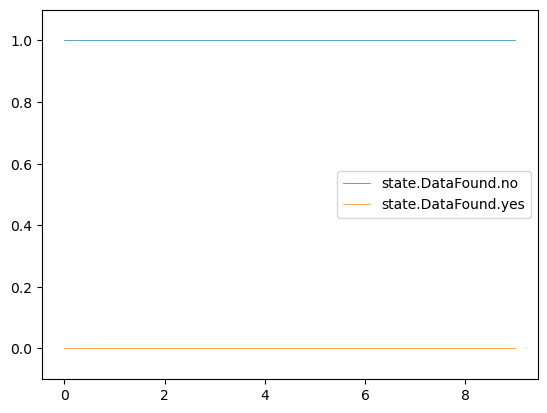

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000               Nop   
4              0.922240               0.077760               Nop   
5              0.823279               0.176721               Nop   
6              0.435112               0.564888               Nop   
7              0.397920               0.602080               Nop   
8              0.423625               0.576375               Nop   
9              0.424504               0.575496               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

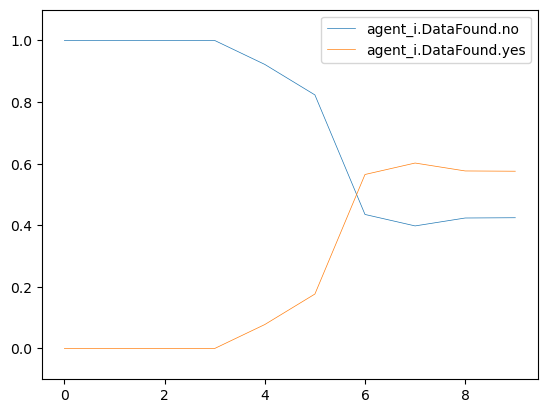

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                            auth   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

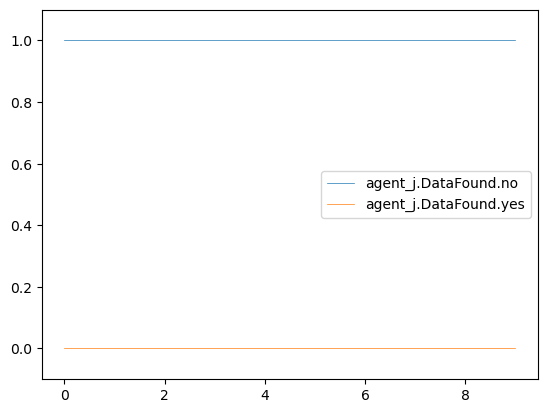

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action agent_j.action
0                   0.0                   1.0  RestrictAccPrivs   EnumAccounts
1                   1.0                   0.0      DecoyAccount           Exit
2                   1.0                   0.0           LogIOCs            Nop
3                   1.0                   0.0               Nop            Nop
4                   1.0                   0.0               Nop            Nop
5                   1.0                   0.0               Nop            Nop
6                   1.0                   0.0               Nop            Nop
7                   1.0                   0.0               Nop            Nop
8                   1.0                   0.0               Nop            Nop
9                   1.0                   0.0               Nop            Nop

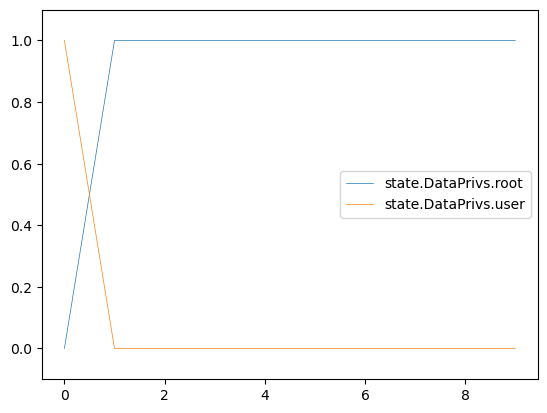

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                        file_enum  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                        file_enum  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

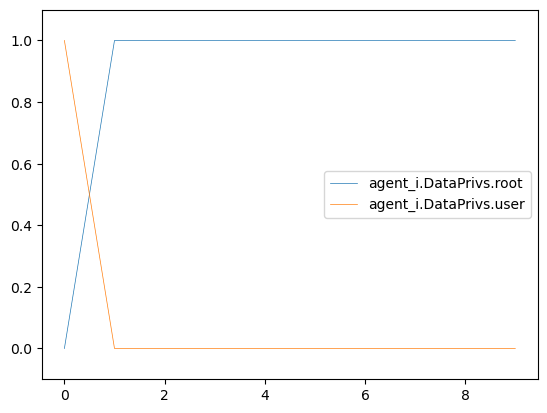

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.571429                0.428571           Exit   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                            auth   
2           LogIOCs                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

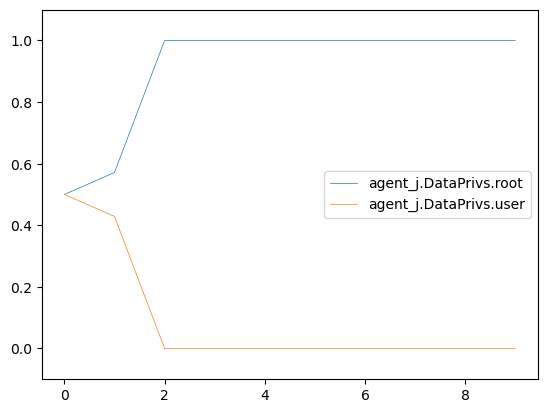

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    